In [2]:
# prompt: how to read files from google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
!git clone https://github.com/CMU-MultiComp-Lab/CMU-MultimodalSDK.git
%cd CMU-MultimodalSDK
!pip install -r requirements.txt
!pip install .

Cloning into 'CMU-MultimodalSDK'...
remote: Enumerating objects: 100, done.
remote: Counting objects: 100% (100/100), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 100 (delta 13), reused 95 (delta 11), pack-reused 0 (from 0)
Receiving objects: 100% (100/100), 294.05 KiB | 14.00 MiB/s, done.
Resolving deltas: 100% (13/13), done.
/content/CMU-MultimodalSDK
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.1 MB/s eta 0:00:00
Processing /content/CMU-MultimodalSDK
  Preparing metadata (setup.py) ... done
  Created wheel for mmsdk: filename=mmsdk-1.1.0-py3-none-any.whl size=79210 sha256=a5283bb066177bab72e92f53e1a6e2bd73a565976065ae980bfb692a8cf4ec08
  Stored in directory: /root/.cache/pip/wheels/95/67/7d/7051855c4c5b9ee1d6fd0623588d84f217296da3b33953a1ab
Successfully built mmsdk


In [4]:
import sys
sys.path.append("/content/CMU-MultimodalSDK")
from mmsdk import mmdatasdk
print("✅ mmsdk installed successfully!")


✅ mmsdk installed successfully!


/content/CMU-MultimodalSDK/mmsdk/mmdatasdk/computational_sequence/file_ops.py:53: SyntaxWarning: "is" with a literal. Did you mean "=="?
  metadataHandle.create_dataset(metadataKey,(1,),dtype=h5py.special_dtype(vlen=unicode) if sys.version_info.major is 2 else h5py.special_dtype(vlen=str))
/content/CMU-MultimodalSDK/mmsdk/mmdatasdk/computational_sequence/file_ops.py:54: SyntaxWarning: "is" with a literal. Did you mean "=="?
  cast_operator=unicode if sys.version_info.major is 2 else str


### 1.0 EDA

In [5]:
from mmsdk import mmdatasdk

# Define dataset path
dataset_path = "/content/drive/MyDrive/Research on BD NYU /development/CMU-MOSEI"

# Load CMU-MOSEI dataset without downloading again
cmu_mosei = mmdatasdk.mmdataset(dataset_path)

# List available features
print("Available features:", cmu_mosei.keys())

[2025-04-20 09:51:54.041] | Success | Computational sequence read from file /content/drive/MyDrive/Research on BD NYU /development/CMU-MOSEI/CMU_MOSEI_Labels.csd ...
[2025-04-20 09:51:54.592] | Status  | Checking the integrity of the <All Labels> computational sequence ...
[2025-04-20 09:51:54.601] | Status  | Checking the format of the data in <All Labels> computational sequence ...


[2025-04-20 09:51:57.606] | Success | <All Labels> computational sequence data in correct format.
[2025-04-20 09:51:57.606] | Status  | Checking the format of the metadata in <All Labels> computational sequence ...
[2025-04-20 09:51:57.606] | Warning | <All Labels> computational sequence does not have all the required metadata ... continuing 
[2025-04-20 09:51:57.606] | Success | Dataset initialized successfully ... 
Available features: dict_keys(['All Labels'])


In [6]:
# Get the list of available video IDs
video_ids = list(cmu_mosei["All Labels"].keys())

print(f"✅ Found {len(video_ids)} videos in CMU-MOSEI dataset.")
print("Example video ID:", video_ids[0])  # Print first video ID

✅ Found 3293 videos in CMU-MOSEI dataset.
Example video ID: --qXJuDtHPw


In [7]:
# Select a sample video
video_id = video_ids[0]

# Get sentiment & emotion annotations
annotations = cmu_mosei["All Labels"][video_id]

# Check if 'metadata' exists in the annotations and print it
if "metadata" in annotations:
    print("Metadata:", annotations["metadata"])
else:
    print("Metadata not found in annotations.")

# Print feature values (sentiment & emotion labels)
print("Feature values (sentiment/emotion scores):", annotations["features"])

Metadata not found in annotations.
Feature values (sentiment/emotion scores): <HDF5 dataset "features": shape (1, 7), type "<f4">


In [8]:
import pandas as pd

data = []

for vid in video_ids:
    for timestamp, labels in zip(cmu_mosei["All Labels"][vid]["intervals"],
                                 cmu_mosei["All Labels"][vid]["features"]):
        sentiment = labels[0]  # First value = sentiment score
        emotions = labels[1:]  # Remaining values = emotion intensities

        data.append({"video_id": vid, "start": timestamp[0], "end": timestamp[1],
                     "sentiment": sentiment, "emotions": emotions})

df = pd.DataFrame(data)
print(df.head())  # Print first few rows

      video_id    start      end  sentiment  \
0  --qXJuDtHPw   23.199   30.325   1.000000   
1  -3g5yACwYnA   82.753  100.555   1.000000   
2  -3g5yACwYnA  119.919  125.299   0.666667   
3  -3g5yACwYnA    4.840   14.052   0.000000   
4  -3g5yACwYnA   13.211   27.521   0.000000   

                                            emotions  
0               [0.6666667, 0.0, 0.0, 0.0, 0.0, 0.0]  
1   [0.6666667, 0.6666667, 0.0, 0.0, 0.0, 0.6666667]  
2                     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  
3  [0.6666667, 0.6666667, 0.0, 0.0, 0.0, 0.33333334]  
4       [0.33333334, 0.33333334, 0.0, 0.0, 0.0, 0.0]  


🔹 Columns Explained: • video_id → Unique video ID • start, end → Time range of annotation • sentiment → Sentiment score (-3 = negative, +3 = positive) • emotions → Array of emotion intensities (happy, sad, anger, disgust, surprise, fear)

<Axes: >

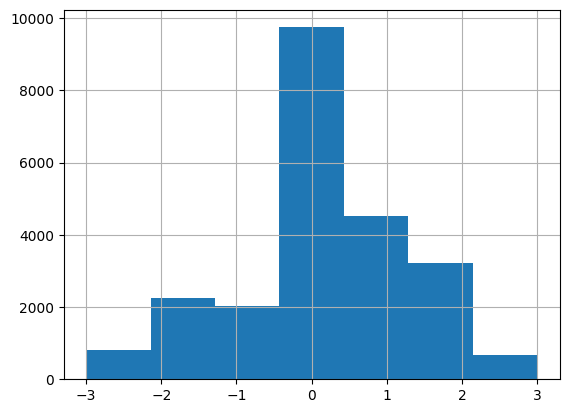

In [9]:
df["sentiment"].hist(bins=7)

In [10]:
positive_sentiments = df[df["sentiment"] > 0]
print(positive_sentiments)

          video_id    start      end  sentiment  \
0      --qXJuDtHPw   23.199   30.325   1.000000   
1      -3g5yACwYnA   82.753  100.555   1.000000   
2      -3g5yACwYnA  119.919  125.299   0.666667   
5      -3g5yACwYnA   26.541   41.300   1.000000   
6      -3g5yACwYnA   74.083   82.776   0.666667   
...            ...      ...      ...        ...   
23252  zwTrXwi54us   25.154   40.482   0.333333   
23253  zwTrXwi54us   40.160   48.444   0.333333   
23256  zwTrXwi54us   52.652   57.942   1.000000   
23257  zwTrXwi54us   57.980   69.326   0.666667   
23258  zx4W0Vuus-I   15.057   38.327   1.000000   

                                               emotions  
0                  [0.6666667, 0.0, 0.0, 0.0, 0.0, 0.0]  
1      [0.6666667, 0.6666667, 0.0, 0.0, 0.0, 0.6666667]  
2                        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  
5                  [0.6666667, 0.0, 0.0, 0.0, 0.0, 0.0]  
6           [0.0, 0.6666667, 0.0, 0.0, 0.0, 0.33333334]  
...                                    

In [11]:
# Extract emotions into separate columns
emotion_columns = ["happy", "sad", "anger", "disgust", "surprise", "fear"]
for i, col in enumerate(emotion_columns):
    df[col] = df["emotions"].apply(lambda x: x[i])
print(df.head())

      video_id    start      end  sentiment  \
0  --qXJuDtHPw   23.199   30.325   1.000000   
1  -3g5yACwYnA   82.753  100.555   1.000000   
2  -3g5yACwYnA  119.919  125.299   0.666667   
3  -3g5yACwYnA    4.840   14.052   0.000000   
4  -3g5yACwYnA   13.211   27.521   0.000000   

                                            emotions     happy       sad  \
0               [0.6666667, 0.0, 0.0, 0.0, 0.0, 0.0]  0.666667  0.000000   
1   [0.6666667, 0.6666667, 0.0, 0.0, 0.0, 0.6666667]  0.666667  0.666667   
2                     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  0.000000  0.000000   
3  [0.6666667, 0.6666667, 0.0, 0.0, 0.0, 0.33333334]  0.666667  0.666667   
4       [0.33333334, 0.33333334, 0.0, 0.0, 0.0, 0.0]  0.333333  0.333333   

   anger  disgust  surprise      fear  
0    0.0      0.0       0.0  0.000000  
1    0.0      0.0       0.0  0.666667  
2    0.0      0.0       0.0  0.000000  
3    0.0      0.0       0.0  0.333333  
4    0.0      0.0       0.0  0.000000  


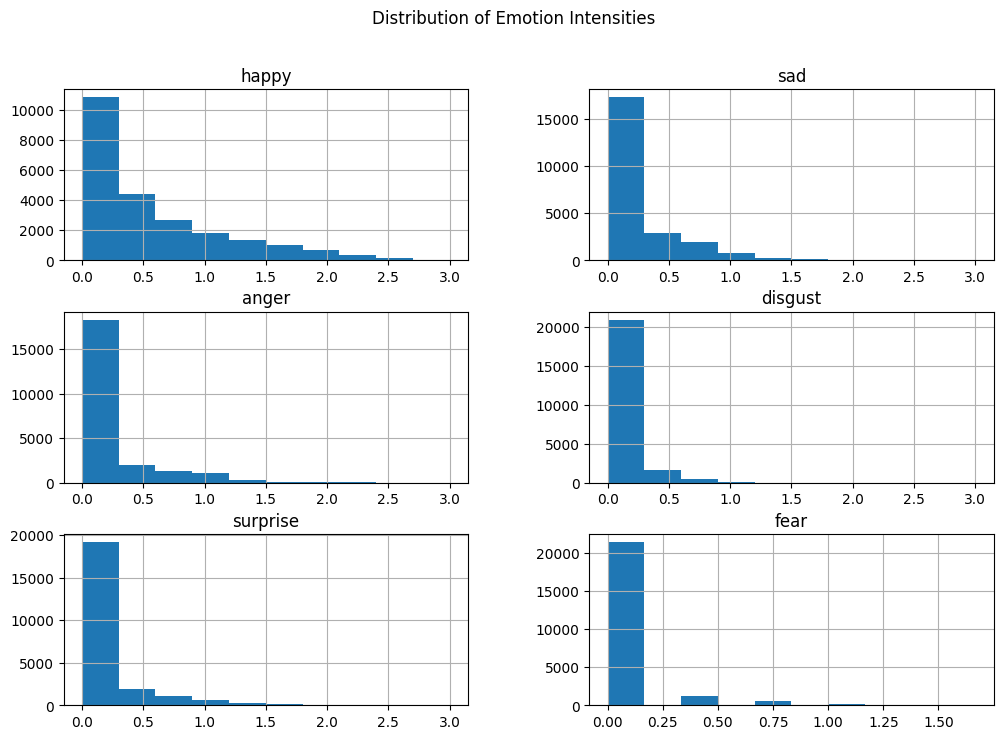

In [12]:
import matplotlib.pyplot as plt

# Plot histograms for each emotion
df[emotion_columns].hist(bins=10, figsize=(12, 8))
plt.suptitle("Distribution of Emotion Intensities")
plt.show()

In [13]:
# Calculate correlation matrix
correlation_matrix = df[emotion_columns].corr()
print(correlation_matrix)

             happy       sad     anger   disgust  surprise      fear
happy     1.000000 -0.259992 -0.234854  0.031652 -0.204349 -0.045295
sad      -0.259992  1.000000  0.043621  0.041659  0.195598  0.131513
anger    -0.234854  0.043621  1.000000  0.039064  0.440462 -0.001719
disgust   0.031652  0.041659  0.039064  1.000000  0.137991  0.027374
surprise -0.204349  0.195598  0.440462  0.137991  1.000000 -0.011376
fear     -0.045295  0.131513 -0.001719  0.027374 -0.011376  1.000000


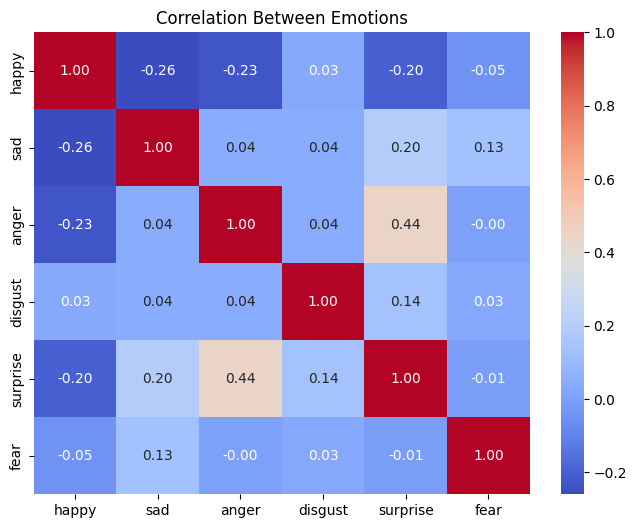

In [14]:
import seaborn as sns

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Emotions")
plt.show()

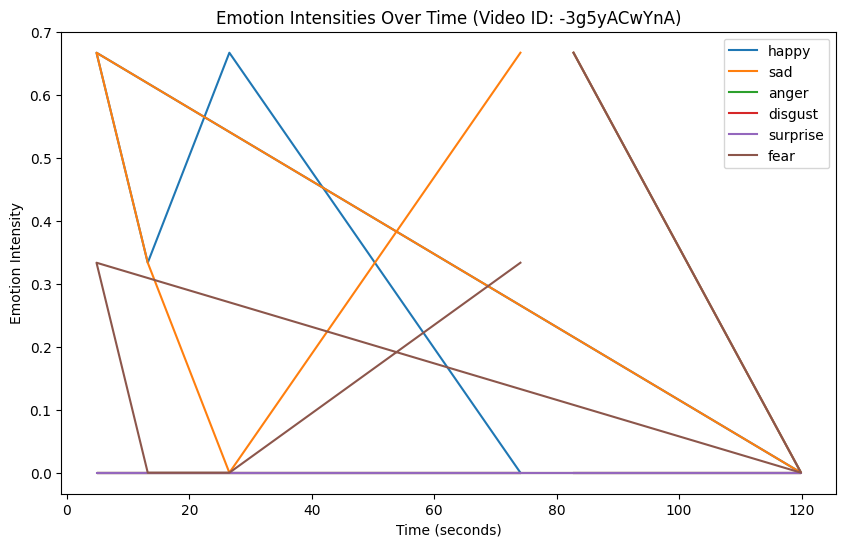

In [15]:
# Example: Plot emotion intensities over time for a single video
video_id = "-3g5yACwYnA"
video_data = df[df["video_id"] == video_id]

plt.figure(figsize=(10, 6))
for col in emotion_columns:
    plt.plot(video_data["start"], video_data[col], label=col)

plt.title(f"Emotion Intensities Over Time (Video ID: {video_id})")
plt.xlabel("Time (seconds)")
plt.ylabel("Emotion Intensity")
plt.legend()
plt.show()

In [16]:
# Calculate average emotion intensities by video
avg_emotions_by_video = df.groupby("video_id")[emotion_columns].mean()
print(avg_emotions_by_video)

                happy       sad     anger  disgust  surprise      fear
video_id                                                              
--qXJuDtHPw  0.666667  0.000000  0.000000      0.0       0.0  0.000000
-3g5yACwYnA  0.388889  0.388889  0.000000      0.0       0.0  0.222222
-3nNcZdcdvU  1.888889  0.000000  0.000000      0.0       0.0  0.000000
-571d8cVauQ  0.222222  0.111111  0.000000      0.0       0.0  0.000000
-6rXp3zJ3kc  0.000000  0.333333  0.111111      0.0       0.0  0.000000
...               ...       ...       ...      ...       ...       ...
zv0Jl4TIQDc  1.777778  0.000000  0.222222      0.0       0.0  0.000000
zvZd3V5D5Ik  1.500000  0.000000  0.000000      0.0       0.0  0.000000
zwRBZisdpQ0  1.466667  0.066667  0.000000      0.0       0.0  0.000000
zwTrXwi54us  0.282051  0.000000  0.000000      0.0       0.0  0.000000
zx4W0Vuus-I  1.000000  0.000000  0.000000      0.0       0.0  0.000000

[3293 rows x 6 columns]


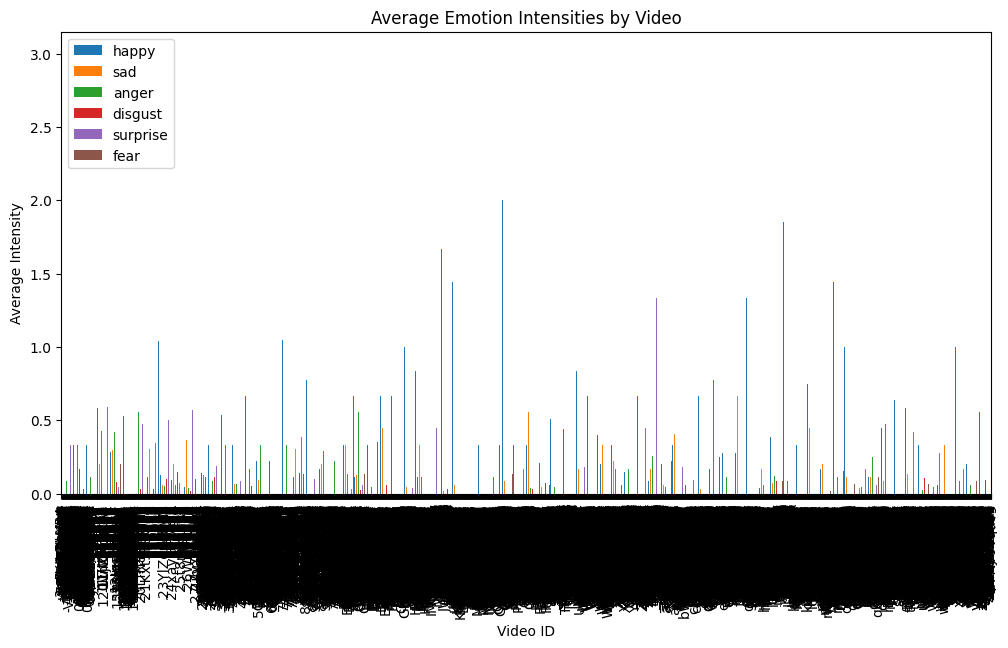

In [17]:
# Plot average emotion intensities by video
avg_emotions_by_video.plot(kind="bar", figsize=(12, 6))
plt.title("Average Emotion Intensities by Video")
plt.xlabel("Video ID")
plt.ylabel("Average Intensity")
plt.show()

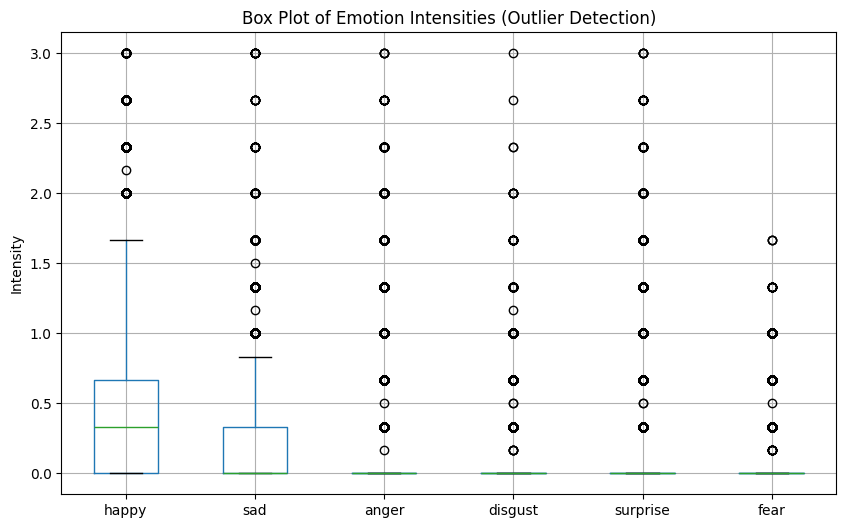

In [18]:
# Plot box plots to identify outliers
plt.figure(figsize=(10, 6))
df[emotion_columns].boxplot()
plt.title("Box Plot of Emotion Intensities (Outlier Detection)")
plt.ylabel("Intensity")
plt.show()

In [19]:
from scipy.stats import zscore

# Calculate Z-scores for emotion intensities
z_scores = df[emotion_columns].apply(zscore)

# Identify outliers (Z-score > 3 or < -3)
outliers = df[(z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)]
print("Outliers:")
print(outliers)

Outliers:
          video_id       start         end  sentiment  \
1      -3g5yACwYnA   82.753000  100.555000   1.000000   
18     -9YyBTjo1zo    5.977778   22.672109   2.000000   
24     -9y-fZ3swSY   16.055000   22.832000   1.333333   
29     -AUZQgSxyPQ   13.122000   35.513000   0.666667   
39     -Alixo7euuU  184.982086  189.950794   0.666667   
...            ...         ...         ...        ...   
23227  zrFZAofNGi4   79.411000   94.349000   0.666667   
23228  zrFZAofNGi4   15.885000   23.091000  -2.000000   
23229  zrFZAofNGi4   27.589000   33.078000  -1.000000   
23230  zrFZAofNGi4   48.960000   64.088000  -2.666667   
23237  zv0Jl4TIQDc   42.146000   49.242000   2.333333   

                                                emotions     happy       sad  \
1       [0.6666667, 0.6666667, 0.0, 0.0, 0.0, 0.6666667]  0.666667  0.666667   
18           [2.6666667, 0.0, 0.0, 0.33333334, 0.0, 0.0]  2.666667  0.000000   
24                 [1.0, 0.0, 0.33333334, 1.0, 0.0, 0.0]  1.00000

### 1.1 Label Creation for Bipolar States

In [20]:
# Define a function to classify states
def classify_state(row):
    sentiment = row["sentiment"]
    emotions = row["emotions"]

    if sentiment > 1 and emotions[0] > 0.5:  # High sentiment + high happiness
        return "mania"
    elif sentiment < -1 and (emotions[1] > 0.5 or emotions[2] > 0.5):  # Low sentiment + high sadness/anger
        return "depression"
    else:
        return "euthymia"  # Neutral sentiment + balanced emotions

# Apply the function to classify states
df["state"] = df.apply(classify_state, axis=1)

# Print the updated DataFrame
print(df.head())

      video_id    start      end  sentiment  \
0  --qXJuDtHPw   23.199   30.325   1.000000   
1  -3g5yACwYnA   82.753  100.555   1.000000   
2  -3g5yACwYnA  119.919  125.299   0.666667   
3  -3g5yACwYnA    4.840   14.052   0.000000   
4  -3g5yACwYnA   13.211   27.521   0.000000   

                                            emotions     happy       sad  \
0               [0.6666667, 0.0, 0.0, 0.0, 0.0, 0.0]  0.666667  0.000000   
1   [0.6666667, 0.6666667, 0.0, 0.0, 0.0, 0.6666667]  0.666667  0.666667   
2                     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  0.000000  0.000000   
3  [0.6666667, 0.6666667, 0.0, 0.0, 0.0, 0.33333334]  0.666667  0.666667   
4       [0.33333334, 0.33333334, 0.0, 0.0, 0.0, 0.0]  0.333333  0.333333   

   anger  disgust  surprise      fear     state  
0    0.0      0.0       0.0  0.000000  euthymia  
1    0.0      0.0       0.0  0.666667  euthymia  
2    0.0      0.0       0.0  0.000000  euthymia  
3    0.0      0.0       0.0  0.333333  euthymia  
4    0.0  

In [21]:
state_counts = df["state"].value_counts()
print(state_counts)

state
euthymia      17979
mania          3230
depression     2050
Name: count, dtype: int64


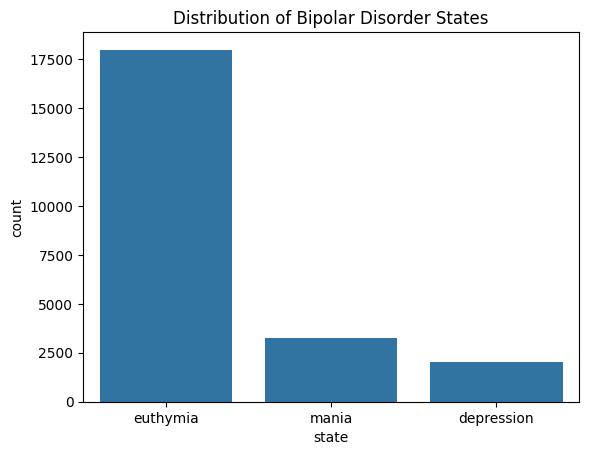

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df["state"])
plt.title("Distribution of Bipolar Disorder States")
plt.show()

In [23]:
# Extract emotion columns
emotion_columns = ["happy", "sad", "anger", "disgust", "surprise", "fear"]
for i, col in enumerate(emotion_columns):
    df[col] = df["emotions"].apply(lambda x: x[i])

# Group by state and calculate mean emotion intensities
state_emotions = df.groupby("state")[emotion_columns].mean()
print(state_emotions)

               happy       sad     anger   disgust  surprise      fear
state                                                                 
depression  0.053496  0.536341  0.755610  0.082764  0.640650  0.041463
euthymia    0.349602  0.136567  0.110740  0.042105  0.080409  0.043087
mania       1.476522  0.032043  0.025387  0.057895  0.006295  0.028947


### 1.2 Temporal Analysis

1. Group data by video
2. Analyze a single video
3. Plot sentiment over time
4. Plot emotion intensities over time
5. Plot state transitions
6. Aggregate temporal patterns across videos
7. Visualize aggregated results

In [24]:
grouped = df.groupby("video_id")  # 1. group the dataframe by `video_id` to analyze each video separately

In [25]:
# prompt: generate a random number using seed to keep the same number throughout the experiment

import random

# Set a seed for reproducibility
random.seed(42)  # You can choose any integer as the seed

# Generate a random number between 0 and 1
random_number = random.random()

random_number = int(random_number * len(video_ids))
print(random_number)

2105


In [26]:
video_id = video_ids[random_number]
video_data = grouped.get_group(video_id)

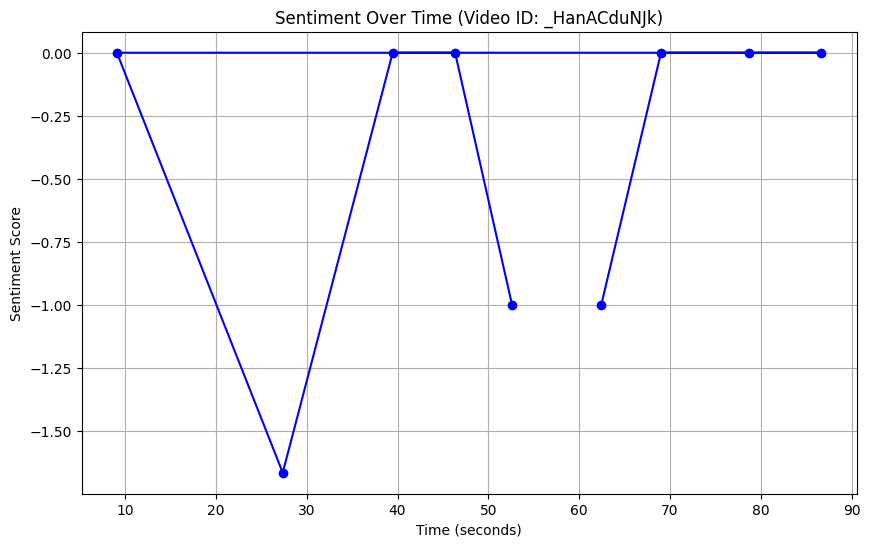

In [27]:
import matplotlib.pyplot as plt

# Plot sentiment over time
plt.figure(figsize=(10, 6))
plt.plot(video_data["start"], video_data["sentiment"], marker="o", linestyle="-", color="b")
plt.title(f"Sentiment Over Time (Video ID: {video_id})")
plt.xlabel("Time (seconds)")
plt.ylabel("Sentiment Score")
plt.grid(True)
plt.show()

<ipython-input-28-5bdde18228ea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  video_data[col] = video_data["emotions"].apply(lambda x: x[i])


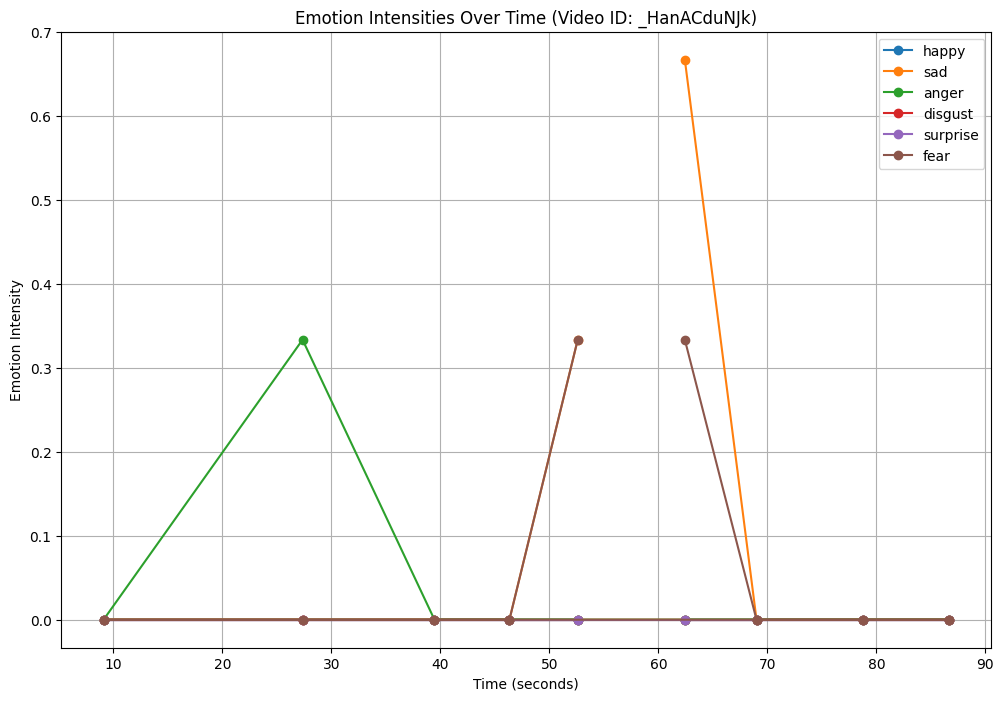

In [28]:
# Extract emotion columns
emotion_columns = ["happy", "sad", "anger", "disgust", "surprise", "fear"]
for i, col in enumerate(emotion_columns):
    video_data[col] = video_data["emotions"].apply(lambda x: x[i])

# Plot emotions over time
plt.figure(figsize=(12, 8))
for col in emotion_columns:
    plt.plot(video_data["start"], video_data[col], label=col, marker="o", linestyle="-")

plt.title(f"Emotion Intensities Over Time (Video ID: {video_id})")
plt.xlabel("Time (seconds)")
plt.ylabel("Emotion Intensity")
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-29-db7c240bbc93>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  video_data["state_num"] = video_data["state"].map(state_mapping)


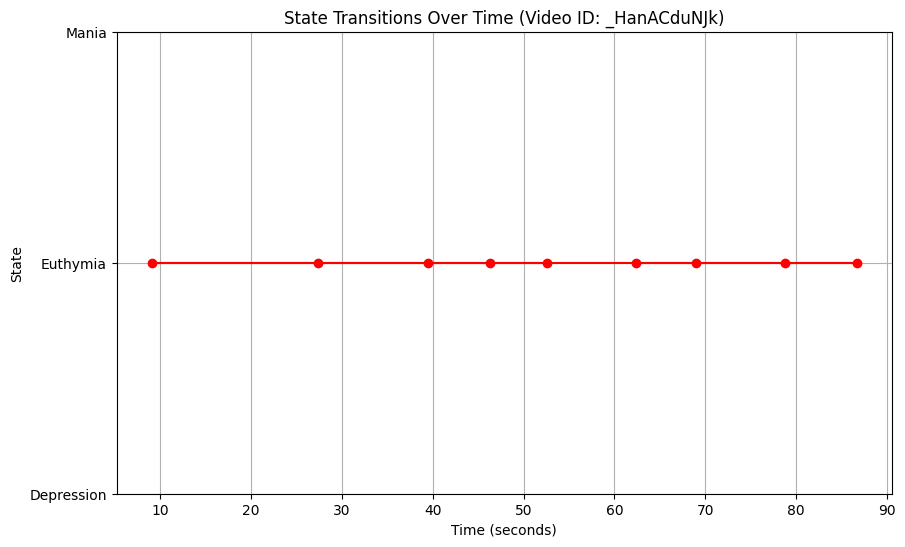

In [29]:
# Map states to numerical values for plotting
state_mapping = {"mania": 2, "euthymia": 1, "depression": 0}
video_data["state_num"] = video_data["state"].map(state_mapping)

# Plot state transitions
plt.figure(figsize=(10, 6))
plt.plot(video_data["start"], video_data["state_num"], marker="o", linestyle="-", color="r")
plt.yticks([0, 1, 2], ["Depression", "Euthymia", "Mania"])
plt.title(f"State Transitions Over Time (Video ID: {video_id})")
plt.xlabel("Time (seconds)")
plt.ylabel("State")
plt.grid(True)
plt.show()

In [30]:
def calculate_state_durations(video_data):
    video_data["duration"] = video_data["end"] - video_data["start"]
    state_durations = video_data.groupby("state")["duration"].sum()
    return state_durations

# Apply to all videos
all_state_durations = df.groupby("video_id").apply(calculate_state_durations)
print(all_state_durations)

video_id     state   
--qXJuDtHPw  euthymia     7.126
-3g5yACwYnA  euthymia    70.156
-3nNcZdcdvU  euthymia    25.071
-571d8cVauQ  euthymia    26.566
-6rXp3zJ3kc  euthymia    34.988
                          ...  
zwRBZisdpQ0  euthymia    15.262
             mania       13.325
zwTrXwi54us  euthymia    91.051
             mania       10.589
zx4W0Vuus-I  euthymia    23.270
Name: duration, Length: 5079, dtype: float64


<ipython-input-30-fe5feaf69dc0>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  all_state_durations = df.groupby("video_id").apply(calculate_state_durations)


In [31]:
def identify_transitions(video_data):
    transitions = []
    prev_state = None
    for _, row in video_data.iterrows():
        if prev_state is not None and row["state"] != prev_state:
            transitions.append((prev_state, row["state"]))
        prev_state = row["state"]
    return transitions

# Apply to all videos
all_transitions = df.groupby("video_id").apply(identify_transitions)
print(all_transitions)

video_id
--qXJuDtHPw                                                   []
-3g5yACwYnA                                                   []
-3nNcZdcdvU                                                   []
-571d8cVauQ                                                   []
-6rXp3zJ3kc                                                   []
                                     ...                        
zv0Jl4TIQDc                                  [(euthymia, mania)]
zvZd3V5D5Ik                                  [(mania, euthymia)]
zwRBZisdpQ0    [(mania, euthymia), (euthymia, mania), (mania,...
zwTrXwi54us               [(euthymia, mania), (mania, euthymia)]
zx4W0Vuus-I                                                   []
Length: 3293, dtype: object


<ipython-input-31-76e47e517e56>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  all_transitions = df.groupby("video_id").apply(identify_transitions)


state
depression    23.585824
euthymia      42.803698
mania         20.641543
Name: duration, dtype: float64


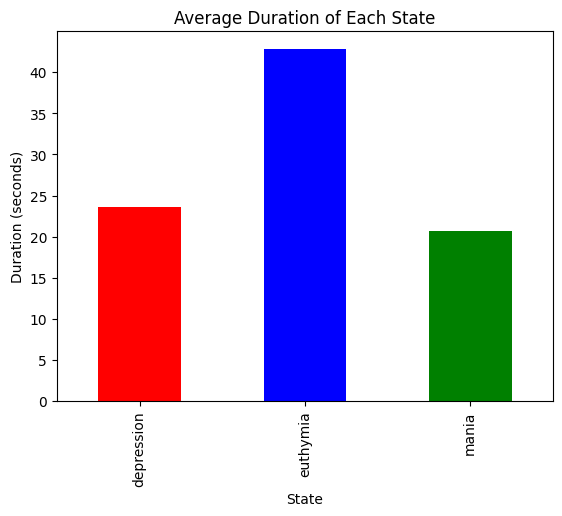

In [32]:
# Average duration of each state
avg_state_durations = all_state_durations.groupby("state").mean()
print(avg_state_durations)

# Plot
avg_state_durations.plot(kind="bar", color=["red", "blue", "green"])
plt.title("Average Duration of Each State")
plt.xlabel("State")
plt.ylabel("Duration (seconds)")
plt.show()

Counter({('euthymia', 'mania'): 1641, ('mania', 'euthymia'): 1637, ('euthymia', 'depression'): 1155, ('depression', 'euthymia'): 1074, ('mania', 'depression'): 46, ('depression', 'mania'): 39})


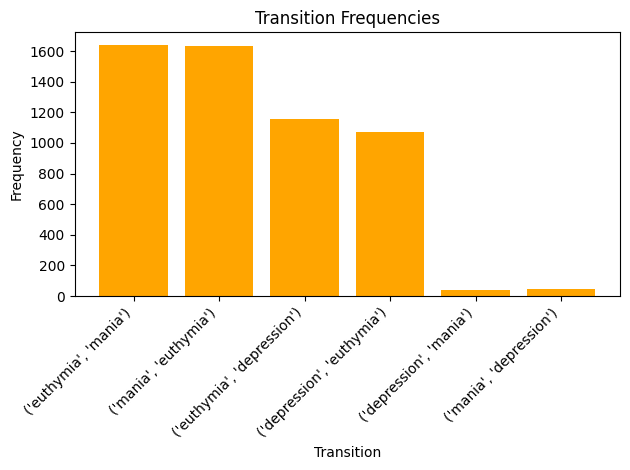

In [33]:
from collections import Counter
import numpy as np
# Count transitions, converting NumPy arrays to tuples
transition_counts = Counter(
    tuple(map(tuple, trans)) if isinstance(trans, (list, np.ndarray)) else trans
    for sublist in all_transitions
    for trans in sublist
)
print(transition_counts)

# Plot
plt.bar(
    [str(key) for key in transition_counts.keys()],
    transition_counts.values(),
    color="orange",
)
plt.title("Transition Frequencies")
plt.xlabel("Transition")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

Euthymia as a Pivot State: The most frequent transitions involve euthymia (neutral state), suggesting it acts as a pivot between mania and depression.

Rapid Mood Swings: Transitions like mania → depression and depression → mania are less frequent but significant, as they represent rapid mood swings characteristic of bipolar disorder.

Stabilization: Transitions like mania → euthymia and depression → euthymia indicate stabilization after an episode.

### 1.3 Video Level Analysis
1. Identify unique transition patterns
2. Group transitions by video - analyze transitions for each video individually
3. Visualize video-level patterns

In [34]:
from collections import Counter

# Function to calculate transitions for a single video
def calculate_transitions(video_data):
    transitions = []
    prev_state = None
    for _, row in video_data.iterrows():
        if prev_state is not None and row["state"] != prev_state:
            transitions.append((prev_state, row["state"]))
        prev_state = row["state"]
    return Counter(transitions)

# Apply to all videos
video_transitions = {video_id: calculate_transitions(video_data) for video_id, video_data in grouped}

In [35]:
# Example: Print transitions for the first 10 videos
for video_id, transitions in list(video_transitions.items())[:10]:
    print(f"Video ID: {video_id}")
    for transition, count in transitions.items():
        print(f"  {transition[0]} → {transition[1]}: {count}")

Video ID: --qXJuDtHPw
Video ID: -3g5yACwYnA
Video ID: -3nNcZdcdvU
Video ID: -571d8cVauQ
Video ID: -6rXp3zJ3kc
Video ID: -9YyBTjo1zo
  euthymia → mania: 1
  mania → euthymia: 1
Video ID: -9y-fZ3swSY
  euthymia → mania: 3
  mania → euthymia: 2
Video ID: -AUZQgSxyPQ
Video ID: -Alixo7euuU
Video ID: -Eqdz5y4pEY


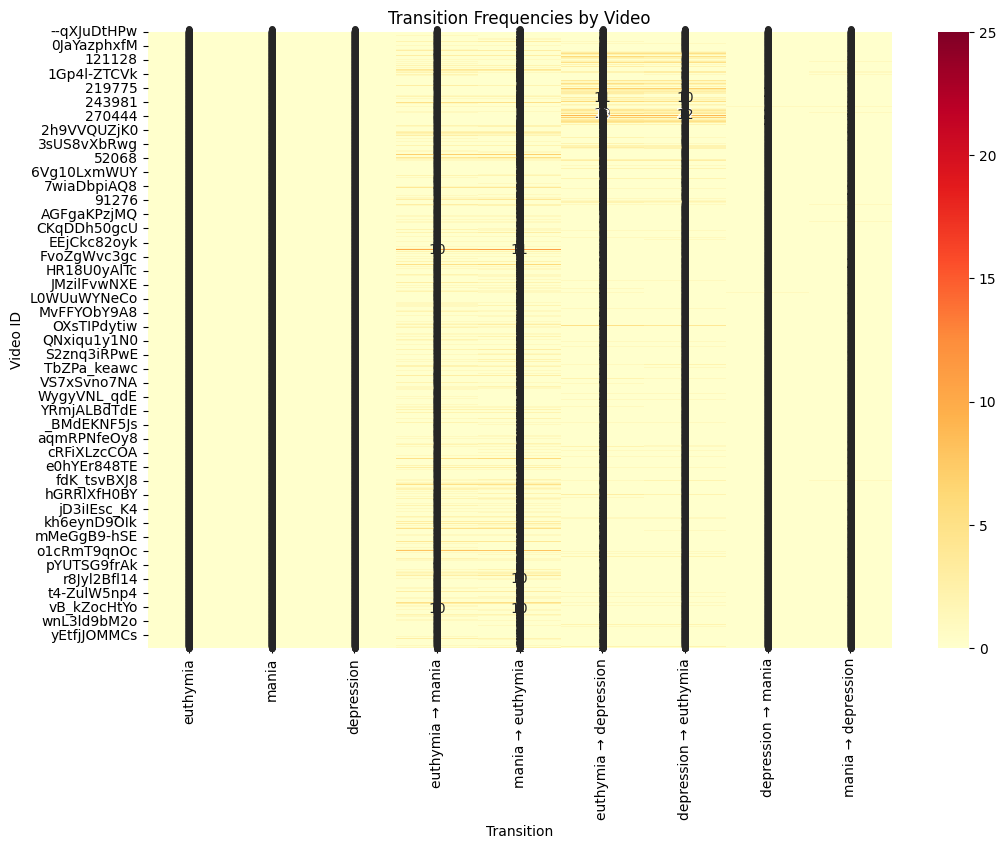

In [36]:
import seaborn as sns
import pandas as pd

# Create a DataFrame for transition frequencies
transition_matrix = pd.DataFrame(0, index=df["video_id"].unique(), columns=["euthymia", "mania", "depression"])

for video_id, transitions in video_transitions.items():
    for (src, dest), count in transitions.items():
        transition_matrix.at[video_id, f"{src} → {dest}"] = count

# Convert all values in transition_matrix to integers, filling NaN with 0
transition_matrix = transition_matrix.fillna(0).astype(int) # fill NaN with 0 before conversion

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(transition_matrix, cmap="YlOrRd", annot=True, fmt="d") # Use 'd' for integer formatting
plt.title("Transition Frequencies by Video")
plt.xlabel("Transition")
plt.ylabel("Video ID")
plt.show()


	•	Most of the values are light yellow, meaning transitions between mood states are relatively low in frequency for most videos.
	•	The black vertical lines likely indicate total occurrences of each mood state across videos.
	•	Some transitions (like “euthymia → mania” and “mania → euthymia”) appear more frequently than others, as seen in the slightly darker regions.
	•	The highest frequency (around 25) occurs in a specific transition, possibly indicating that a particular video had frequent switches between two states.


### 1.4 Identify Outliers: Videos with Unusual Transition Patterns
1. Calculate transition frequencies for each video
2. Define outliers
    - very frequent transitions
    - rare transitions
3. Identify outliers

In [37]:
import numpy as np

# Calculate total transitions per video
total_transitions_per_video = {video_id: sum(transitions.values()) for video_id, transitions in video_transitions.items()}

# Calculate mean and standard deviation of total transitions
mean_transitions = np.mean(list(total_transitions_per_video.values()))
std_transitions = np.std(list(total_transitions_per_video.values()))

# Define outliers as videos with total transitions > mean + 2*std or < mean - 2*std
outliers = {
    video_id: count
    for video_id, count in total_transitions_per_video.items()
    if count > mean_transitions + 2 * std_transitions or count < mean_transitions - 2 * std_transitions
}

print("Outliers (Videos with unusual transition patterns):")
for video_id, count in outliers.items():
    print(f"Video ID: {video_id}, Total Transitions: {count}")

Outliers (Videos with unusual transition patterns):
Video ID: 102389, Total Transitions: 10
Video ID: 102858, Total Transitions: 8
Video ID: 111881, Total Transitions: 11
Video ID: 126542, Total Transitions: 8
Video ID: 126831, Total Transitions: 10
Video ID: 15837, Total Transitions: 8
Video ID: 167521, Total Transitions: 8
Video ID: 189966, Total Transitions: 10
Video ID: 18QjfdhJEM4, Total Transitions: 11
Video ID: 194625, Total Transitions: 9
Video ID: 197778, Total Transitions: 8
Video ID: 1F0qH0EEBfo, Total Transitions: 13
Video ID: 2-4autDbHVQ, Total Transitions: 15
Video ID: 200941, Total Transitions: 8
Video ID: 208322, Total Transitions: 9
Video ID: 208416, Total Transitions: 8
Video ID: 210259, Total Transitions: 10
Video ID: 216007, Total Transitions: 12
Video ID: 220134, Total Transitions: 14
Video ID: 220548, Total Transitions: 11
Video ID: 224263, Total Transitions: 8
Video ID: 224370, Total Transitions: 8
Video ID: 224869, Total Transitions: 8
Video ID: 225416, Total Tr

In [38]:
for video_id in outliers:
    print(f"\nVideo ID: {video_id}")
    print("Transitions:")
    for transition, count in video_transitions[video_id].items():
        print(f"  {transition[0]} → {transition[1]}: {count}")


Video ID: 102389
Transitions:
  euthymia → depression: 5
  depression → euthymia: 5

Video ID: 102858
Transitions:
  euthymia → mania: 4
  mania → euthymia: 4

Video ID: 111881
Transitions:
  euthymia → depression: 6
  depression → euthymia: 5

Video ID: 126542
Transitions:
  euthymia → depression: 4
  depression → euthymia: 4

Video ID: 126831
Transitions:
  euthymia → depression: 5
  depression → euthymia: 5

Video ID: 15837
Transitions:
  euthymia → mania: 3
  mania → euthymia: 3
  mania → depression: 1
  depression → mania: 1

Video ID: 167521
Transitions:
  euthymia → mania: 4
  mania → euthymia: 4

Video ID: 189966
Transitions:
  euthymia → depression: 5
  depression → euthymia: 5

Video ID: 18QjfdhJEM4
Transitions:
  euthymia → depression: 5
  depression → euthymia: 4
  euthymia → mania: 1
  mania → euthymia: 1

Video ID: 194625
Transitions:
  euthymia → mania: 2
  mania → euthymia: 1
  euthymia → depression: 2
  depression → euthymia: 3
  mania → depression: 1

Video ID: 19777

In [39]:
# Group by video_id and calculate mean sentiment and emotion intensities
video_features = df.groupby("video_id").agg({
    "sentiment": "mean",
    "emotions": lambda x: np.mean(np.vstack(x), axis=0)  # Average emotion intensities
}).reset_index()

# Expand emotions into separate columns
emotion_columns = ["happy", "sad", "anger", "disgust", "surprise", "fear"]
for i, col in enumerate(emotion_columns):
    video_features[col] = video_features["emotions"].apply(lambda x: x[i])

# Drop the original emotions column
video_features = video_features.drop(columns=["emotions"])

In [40]:
# Add total transitions per video to video_features
video_features["total_transitions"] = video_features["video_id"].map(total_transitions_per_video)

# Add specific transition counts (e.g., euthymia → mania)
video_features["euthymia_to_mania"] = video_features["video_id"].apply(
    lambda x: video_transitions[x].get(("euthymia", "mania"), 0)
)
video_features["mania_to_euthymia"] = video_features["video_id"].apply(
    lambda x: video_transitions[x].get(("mania", "euthymia"), 0)
)
# Add more transitions as needed

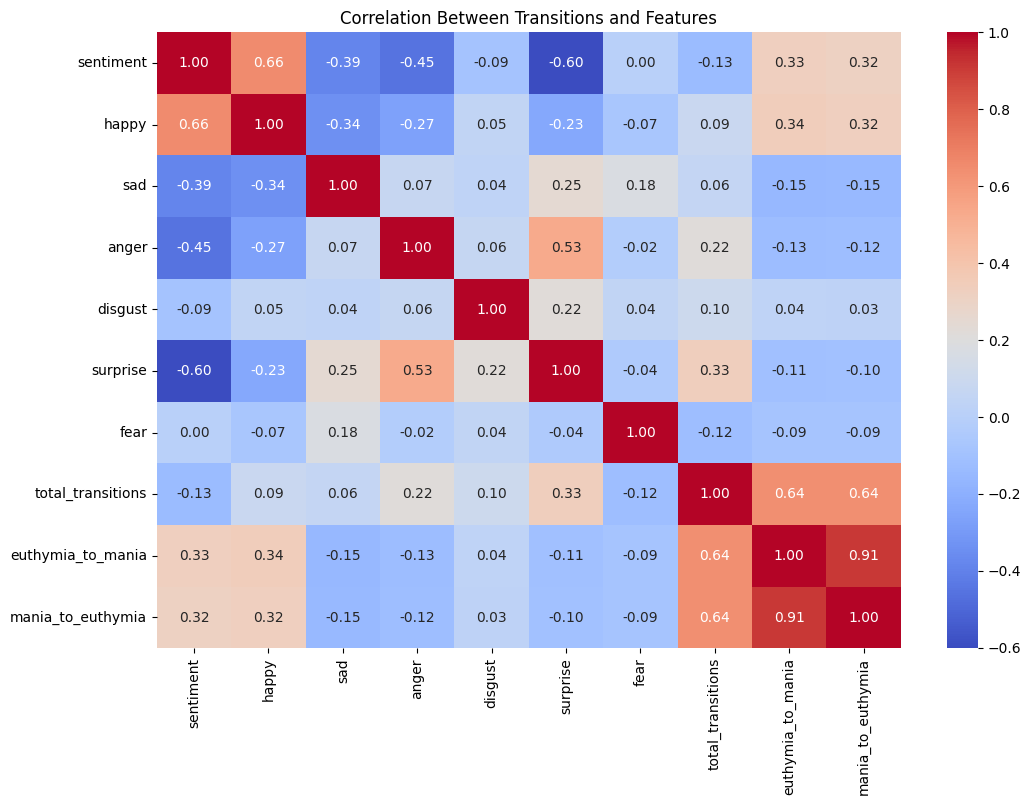

In [41]:
# Calculate correlation matrix, excluding non-numeric columns
correlation_matrix = video_features.drop(columns=['video_id']).corr()

# Plot correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Transitions and Features")
plt.show()

	•	Mood transitions mostly involve euthymia and mania, with strong relationships between these transitions.
	•	Happiness is the strongest positive contributor to sentiment, while surprise and anger lower it.
	•	Depression-related transitions are not prominently featured, meaning most mood shifts happen between euthymia (neutral) and mania (elevated state).
	•	Frequent mood transitions (bipolar-like behavior) are present in some videos, indicated by high transition counts.


In [42]:
correlation = video_features["sentiment"].corr(video_features["total_transitions"])
print(f"Correlation between sentiment and total transitions: {correlation}")

Correlation between sentiment and total transitions: -0.1322026645010779


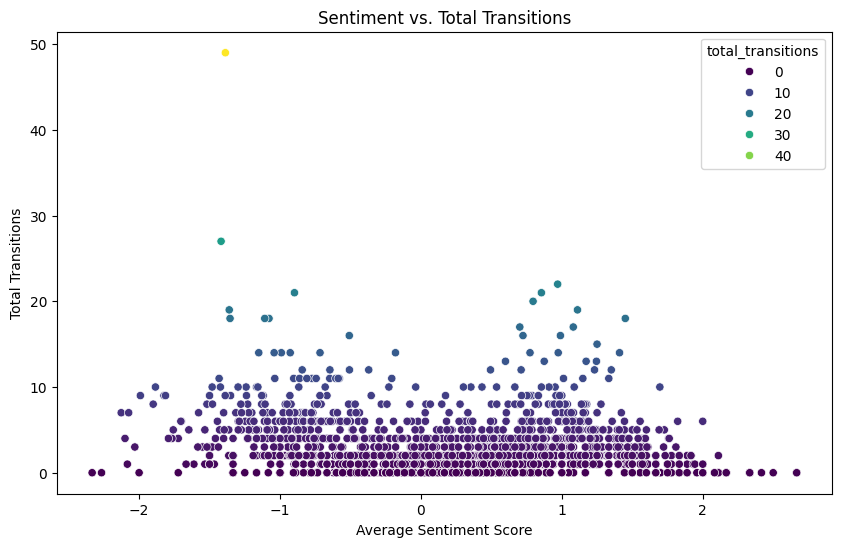

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="sentiment", y="total_transitions", data=video_features, hue="total_transitions", palette="viridis")
plt.title("Sentiment vs. Total Transitions")
plt.xlabel("Average Sentiment Score")
plt.ylabel("Total Transitions")
plt.show()

The correlation is close to 0, indicating a very weak relationship between sentiment and total transitions.

Sentiment scores alone are not a strong predictor of the number of transitions in a video.

In [44]:
# Example: Correlation between sentiment and specific transitions
correlation_euthymia_mania = video_features["sentiment"].corr(video_features["euthymia_to_mania"])
print(f"Correlation between sentiment and euthymia → mania transitions: {correlation_euthymia_mania}")

Correlation between sentiment and euthymia → mania transitions: 0.328373615479455


In [45]:
# Example: Correlation between happiness and total transitions
correlation_happy_transitions = video_features["happy"].corr(video_features["total_transitions"])
print(f"Correlation between happiness and total transitions: {correlation_happy_transitions}")

Correlation between happiness and total transitions: 0.08559838708739227


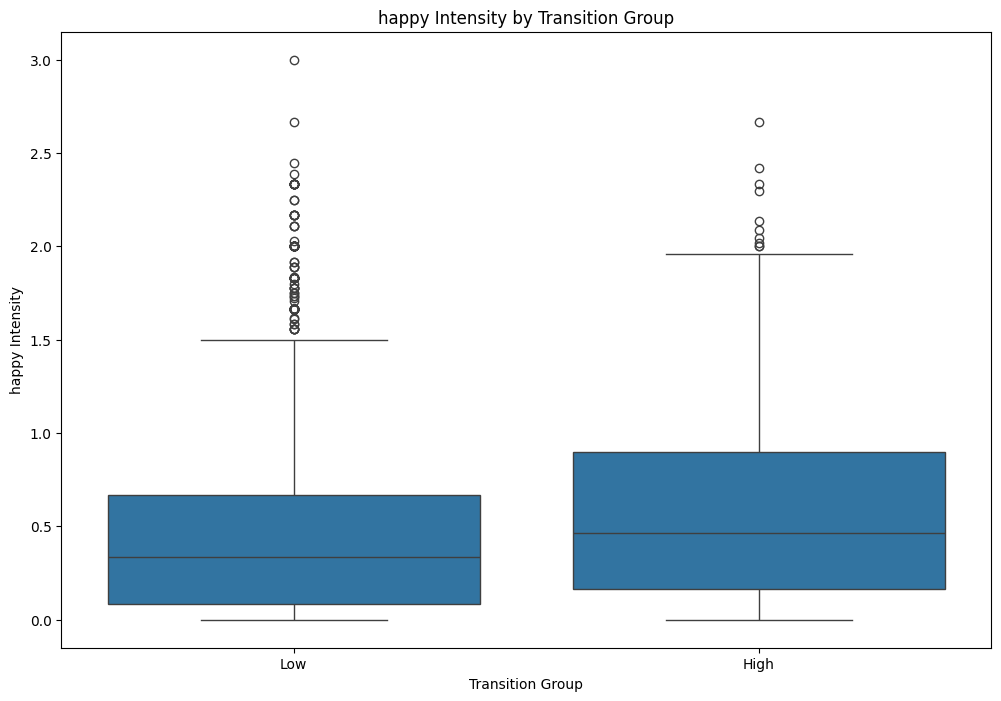

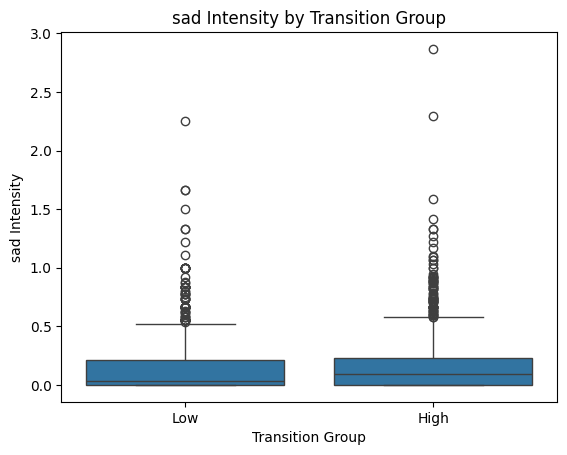

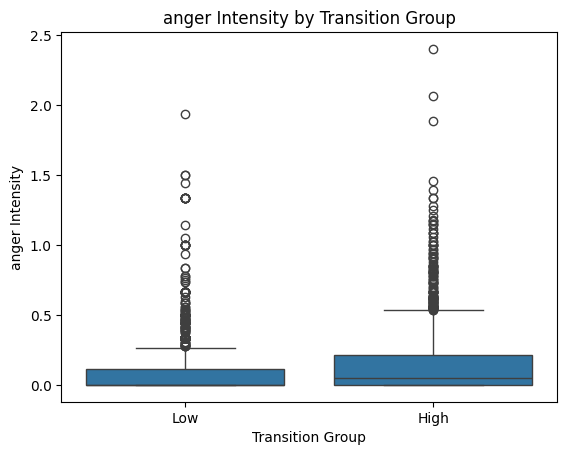

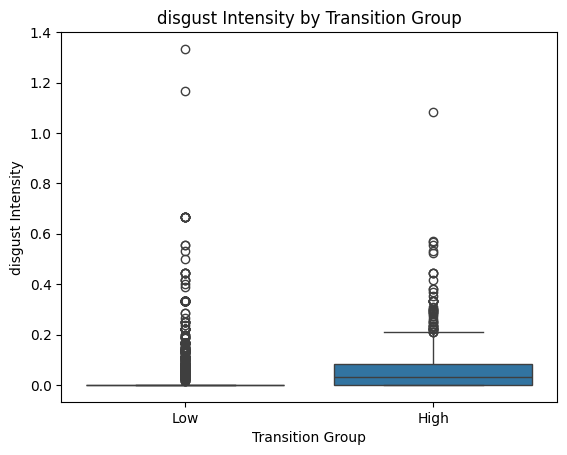

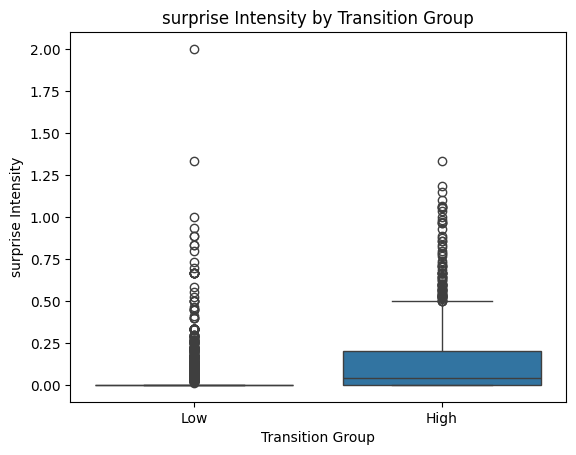

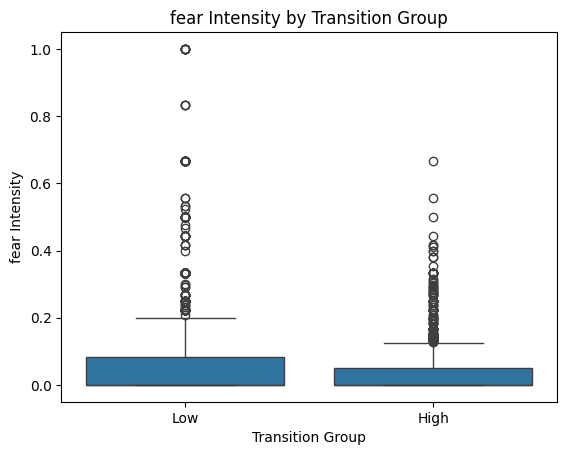

In [46]:
# Define high and low transition groups
video_features["transition_group"] = np.where(
    video_features["total_transitions"] > mean_transitions, "High", "Low"
)

# Plot emotion intensities by transition group
plt.figure(figsize=(12, 8))
for col in emotion_columns:
    sns.boxplot(x="transition_group", y=col, data=video_features)
    plt.title(f"{col} Intensity by Transition Group")
    plt.xlabel("Transition Group")
    plt.ylabel(f"{col} Intensity")
    plt.show()

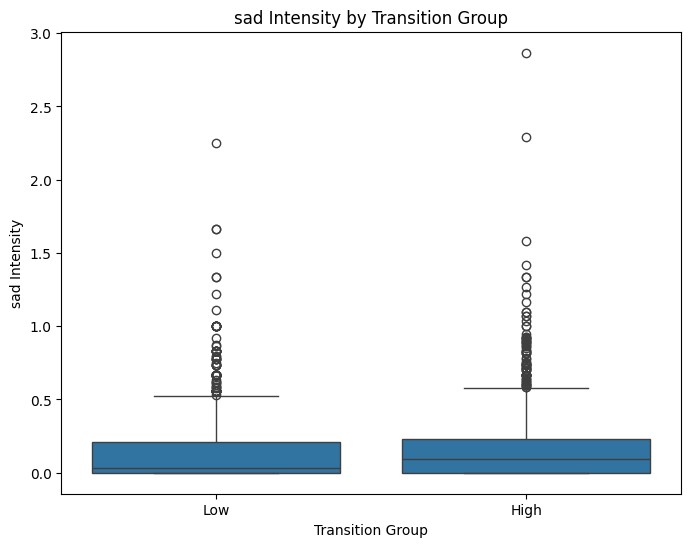

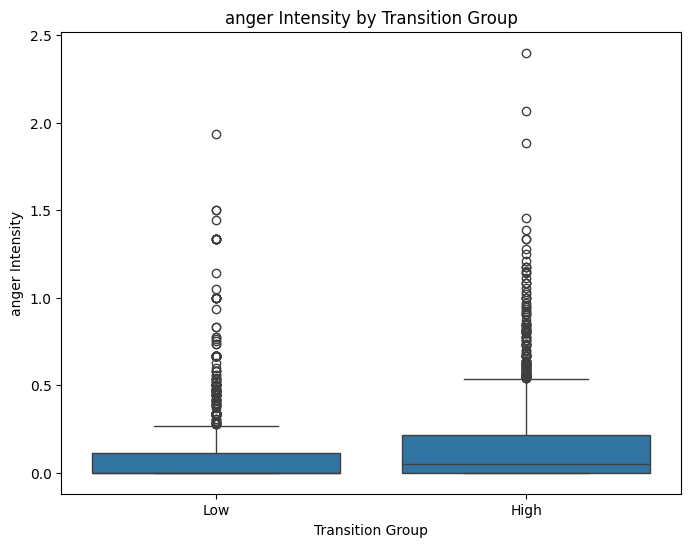

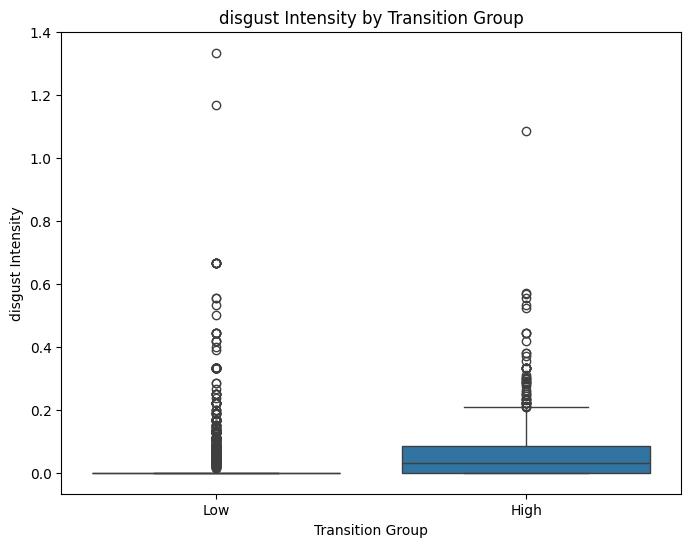

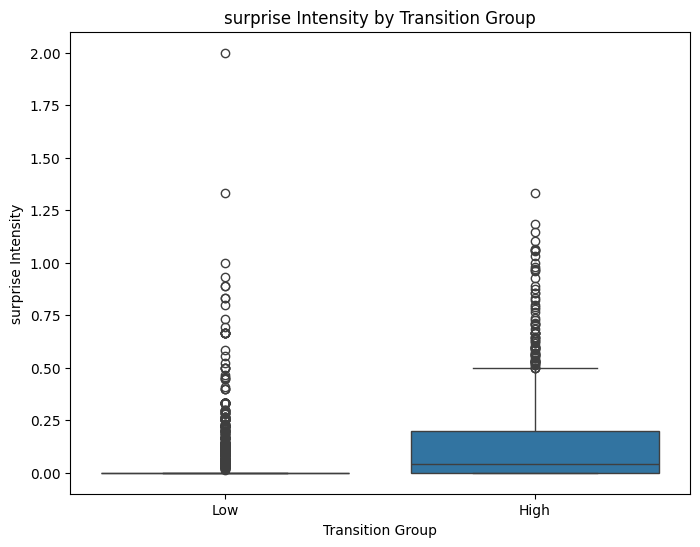

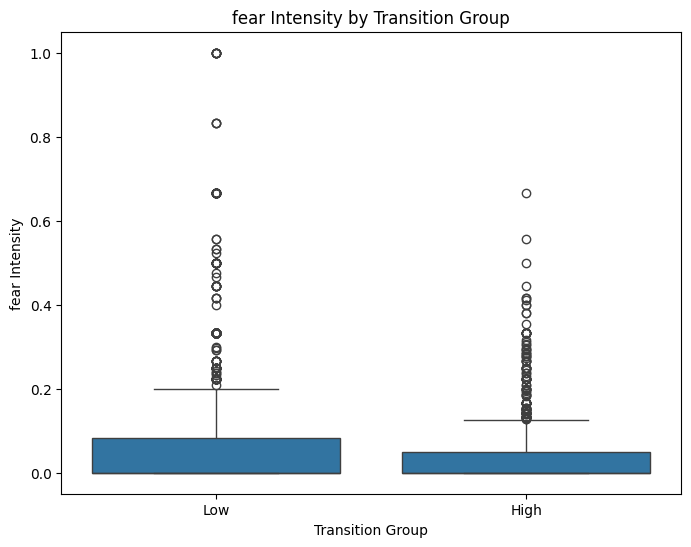

In [47]:
for col in ["sad", "anger", "disgust", "surprise", "fear"]:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x="transition_group", y=col, data=video_features)
    plt.title(f"{col} Intensity by Transition Group")
    plt.xlabel("Transition Group")
    plt.ylabel(f"{col} Intensity")
    plt.show()

In [48]:
from scipy.stats import mannwhitneyu

low_group = video_features[video_features["transition_group"] == "Low"]["happy"]
high_group = video_features[video_features["transition_group"] == "High"]["happy"]

stat, p_value = mannwhitneyu(low_group, high_group)
print(f"Mann-Whitney U test p-value: {p_value}")

Mann-Whitney U test p-value: 1.2630429931859512e-18


The p-value is much smaller than the typical significance level (e.g., 0.05), indicating that the difference in happiness intensity between the Low Transition Group and High Transition Group is statistically significant.

This suggests that videos with fewer transitions tend to have higher happiness intensity compared to videos with more transitions.



In [49]:
correlation_happy_euthymia_mania = video_features["happy"].corr(video_features["euthymia_to_mania"])
print(f"Correlation between happiness and euthymia → mania transitions: {correlation_happy_euthymia_mania}")

Correlation between happiness and euthymia → mania transitions: 0.33826680493641986


There is a moderate positive correlation between happiness intensity and the frequency of euthymia → mania transitions.

This means that videos with higher happiness intensity are more likely to have transitions from euthymia (neutral state) to mania (high-energy, positive state).



In [50]:
# Example: Analyze outliers
outliers = video_features[(video_features["total_transitions"] > mean_transitions + 2 * std_transitions) |
                         (video_features["total_transitions"] < mean_transitions - 2 * std_transitions)]
print("Outliers:")
print(outliers[["video_id", "sentiment", "total_transitions", "happy", "sad", "anger"]])

Outliers:
         video_id  sentiment  total_transitions     happy       sad     anger
115        102389  -0.866667                 10  0.000000  0.200000  0.488889
117        102858   0.973333                  8  0.600000  0.026667  0.266667
131        111881  -1.037037                 11  0.055556  0.296296  0.611111
162        126542  -0.962963                  8  0.037037  0.055556  0.351852
163        126831  -1.481481                 10  0.000000  0.222222  0.555556
...           ...        ...                ...       ...       ...       ...
3045  uU_3tbZ1zG8   0.833333                  9  0.694444  0.277778  0.027778
3049  uYzZB4ccG1Q   0.711111                 12  0.644444  0.000000  0.022222
3083  vM3YB7LmMq4   0.795918                 20  0.768707  0.006803  0.040816
3091  vU0a4F36Ksw   0.984127                  8  0.571429  0.000000  0.000000
3123  wLj_gnNON7A  -0.809524                 11  0.000000  0.158730  0.428571

[142 rows x 6 columns]


Some videos have low sentiment scores but high transition counts, suggesting unstable negative states.

Some videos have high sentiment scores but low happiness intensity, which may indicate mixed emotional states.

In [51]:
import statsmodels.api as sm

# Define dependent and independent variables
X = video_features[["sentiment", "happy", "sad", "anger"]]  # Independent variables
X = sm.add_constant(X)  # Add a constant for the intercept
y = video_features["total_transitions"]  # Dependent variable

# Fit linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      total_transitions   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     91.80
Date:                Sun, 20 Apr 2025   Prob (F-statistic):           4.30e-74
Time:                        09:53:47   Log-Likelihood:                -7915.9
No. Observations:                3293   AIC:                         1.584e+04
Df Residuals:                    3288   BIC:                         1.587e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6820      0.093      7.341      0.0

4. OLS Regression Results
The regression model predicts total transitions based on sentiment, happiness, sadness, and anger intensities. Here’s the interpretation:

Model Summary
R-squared: 0.100 (10% of the variance in total transitions is explained by the model).

Adj. R-squared: 0.099 (adjusted for the number of predictors).

F-statistic: 91.80 (p-value: 4.30e-74), indicating the model is statistically significant.

Coefficients
const (Intercept): 0.6820.

The baseline number of transitions when all predictors are zero.

sentiment: -0.8266 (p-value: 0.000).

For every unit increase in sentiment, the number of transitions decreases by 0.8266.

This aligns with the weak negative correlation observed earlier.

happy: 1.6287 (p-value: 0.000).

For every unit increase in happiness intensity, the number of transitions increases by 1.6287.

This suggests that higher happiness is associated with more transitions.

sad: 0.8346 (p-value: 0.000).

For every unit increase in sadness intensity, the number of transitions increases by 0.8346.

This suggests that higher sadness is also associated with more transitions.

anger: 2.4147 (p-value: 0.000).

For every unit increase in anger intensity, the number of transitions increases by 2.4147.

This suggests that anger is the strongest predictor of transitions among the emotions.

Residual Analysis
Omnibus, Jarque-Bera: Significant p-values indicate that the residuals are not normally distributed, suggesting potential issues with the model (e.g., non-linearity, outliers).

Durbin-Watson: 1.687 (close to 2), indicating no strong autocorrelation in residuals.

Happiness and Transitions:

Higher happiness intensity is associated with more transitions, especially euthymia → mania.

This suggests that happiness may play a role in triggering manic episodes.

Negative Emotions and Transitions:

Higher sadness and anger intensities are also associated with more transitions.

This suggests that negative emotions may contribute to mood instability.

Sentiment and Transitions:

Higher sentiment scores are associated with fewer transitions, indicating that positive sentiment may promote stability.

In [52]:
# Filter outliers by state
# Re-assign the filter based on the state data present in the main dataframe 'df'
mania_outliers = df[(df['video_id'].isin(outliers['video_id'])) & (df["state"] == "mania")]
depression_outliers = df[(df['video_id'].isin(outliers['video_id'])) & (df["state"] == "depression")]
euthymia_outliers = df[(df['video_id'].isin(outliers['video_id'])) & (df["state"] == "euthymia")]

print(f"Mania Outliers: {len(mania_outliers)}")
print(f"Depression Outliers: {len(depression_outliers)}")
print(f"Euthymia Outliers: {len(euthymia_outliers)}")

Mania Outliers: 634
Depression Outliers: 725
Euthymia Outliers: 2204


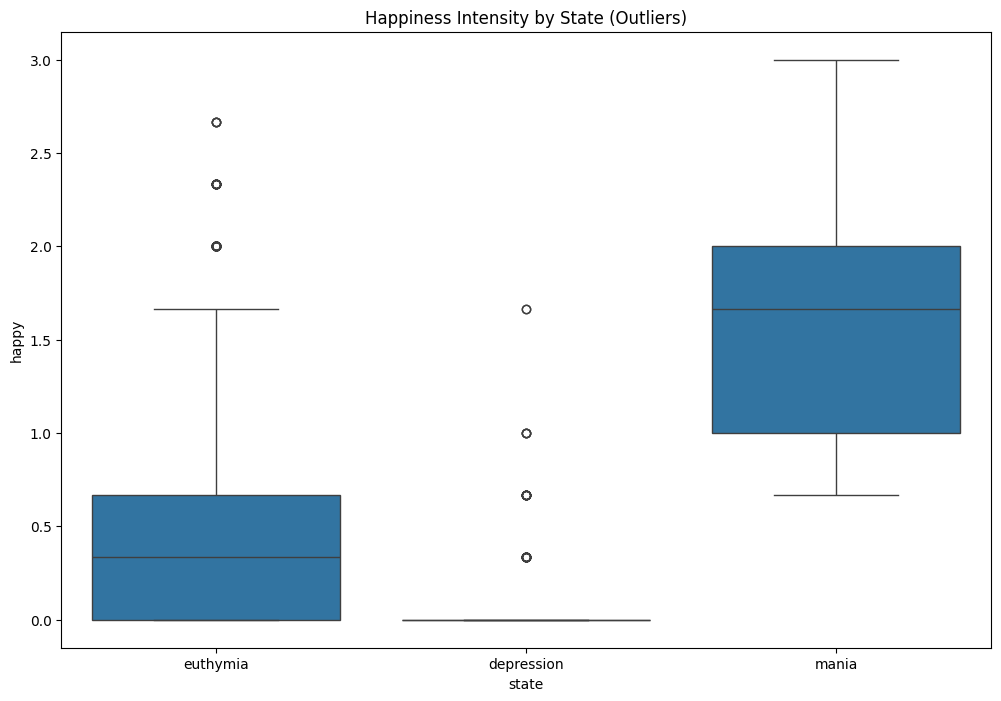

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for emotion intensities by state
plt.figure(figsize=(12, 8))
sns.boxplot(x="state", y="happy", data=df[df['video_id'].isin(outliers['video_id'])])
plt.title("Happiness Intensity by State (Outliers)")
plt.show()

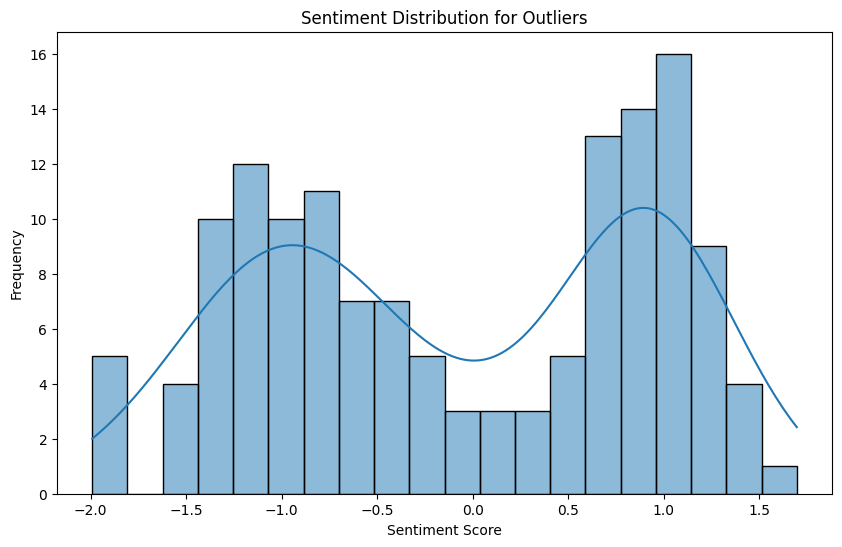

In [54]:
# Histogram of sentiment for outliers
plt.figure(figsize=(10, 6))
sns.histplot(outliers["sentiment"], bins=20, kde=True)
plt.title("Sentiment Distribution for Outliers")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

### 2.0 Baseline model

In [55]:
# prompt: how to deal with imbalance dataset?

# Assuming 'df' is your DataFrame with the target variable 'state' and features
# like sentiment, emotions, etc.
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.state == 'euthymia']  # Replace 'euthymia' with your majority class
df_minority = df[df.state == 'mania']  # Replace 'mania' with your minority class

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
print(df_upsampled.state.value_counts())


# Alternatively, you can downsample the majority class:
# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,    # sample without replacement
                                   n_samples=len(df_minority),     # to match minority class
                                   random_state=123) # reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_minority, df_majority_downsampled])

# Display new class counts
print(df_downsampled.state.value_counts())


# You can also use techniques like SMOTE (Synthetic Minority Over-sampling Technique)
# to generate synthetic data points for the minority class.
# Install imblearn library
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

# Separate features and target
X = df.drop(['state', 'video_id', 'emotions'], axis=1)  # Drop 'video_id' and 'emotions'
y = df.state

# Extract emotion columns into separate columns in X
emotion_columns = ["happy", "sad", "anger", "disgust", "surprise", "fear"]
for i, col in enumerate(emotion_columns):
    X[col] = df["emotions"].apply(lambda x: x[i])

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with resampled data
df_smote = pd.concat([X_resampled, y_resampled], axis=1)

# Display new class counts
print(df_smote.state.value_counts())



state
euthymia    17979
mania       17979
Name: count, dtype: int64
state
mania       3230
euthymia    3230
Name: count, dtype: int64
state
euthymia      17979
mania         17979
depression    17979
Name: count, dtype: int64


In [56]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [57]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(43149, 9) (10788, 9) (43149,) (10788,)


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train Logistic Regression model
model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9707081942899518
Classification Report:
               precision    recall  f1-score   support

  depression       0.96      0.99      0.98      3594
    euthymia       0.98      0.93      0.95      3587
       mania       0.97      1.00      0.98      3607

    accuracy                           0.97     10788
   macro avg       0.97      0.97      0.97     10788
weighted avg       0.97      0.97      0.97     10788



The model performs exceptionally well for euthymia and mania, but there is room for improvement in detecting depression.

The lower recall for depression suggests that the model may miss some cases of depression, which could be critical in a clinical setting.

In [59]:
from sklearn.linear_model import LogisticRegression

# Use class weights to handle imbalance
model = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    class_weight="balanced",  # Adjust weights inversely proportional to class frequencies
    max_iter=1000
)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
               precision    recall  f1-score   support

  depression       0.96      0.99      0.98      3594
    euthymia       0.98      0.93      0.95      3587
       mania       0.97      1.00      0.98      3607

    accuracy                           0.97     10788
   macro avg       0.97      0.97      0.97     10788
weighted avg       0.97      0.97      0.97     10788



In [60]:
# prompt: suppress warning

import warnings
warnings.filterwarnings('ignore')


In [61]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],  # Regularization strength
    "solver": ["lbfgs", "liblinear"]
}

# Perform grid search
grid_search = GridSearchCV(LogisticRegression(multi_class="multinomial", max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate best model
y_pred = grid_search.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'C': 0.1, 'solver': 'lbfgs'}
Classification Report:
               precision    recall  f1-score   support

  depression       0.96      1.00      0.98      3594
    euthymia       0.99      0.92      0.96      3587
       mania       0.97      1.00      0.98      3607

    accuracy                           0.97     10788
   macro avg       0.97      0.97      0.97     10788
weighted avg       0.97      0.97      0.97     10788



The model performs exceptionally well for euthymia and mania, with near-perfect precision, recall, and F1-scores.

For depression, the model has slightly lower recall (0.80), meaning it misses about 20% of actual depression cases. This could be due to class imbalance or the inherent complexity of detecting depression.



### 3.0 Experiment through other models

In [62]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

  depression       1.00      1.00      1.00      3594
    euthymia       1.00      1.00      1.00      3587
       mania       1.00      1.00      1.00      3607

    accuracy                           1.00     10788
   macro avg       1.00      1.00      1.00     10788
weighted avg       1.00      1.00      1.00     10788



In [63]:
# Get feature importance
feature_importance = pd.DataFrame({
    "feature": X_train.columns,  # Use X_train.columns instead of X.columns
    "importance": model.feature_importances_
})
print(feature_importance.sort_values(by="importance", ascending=False))

     feature  importance
2  sentiment    0.558312
3      happy    0.176564
7   surprise    0.111584
5      anger    0.081288
4        sad    0.066526
0      start    0.001862
1        end    0.001745
6    disgust    0.001535
8       fear    0.000584


In [64]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")
print("Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0


The model generalizes extremely well to unseen data, as indicated by the consistent 100% accuracy across all folds.

This suggests that the model is not overfitting and is highly robust.



<Figure size 640x480 with 0 Axes>

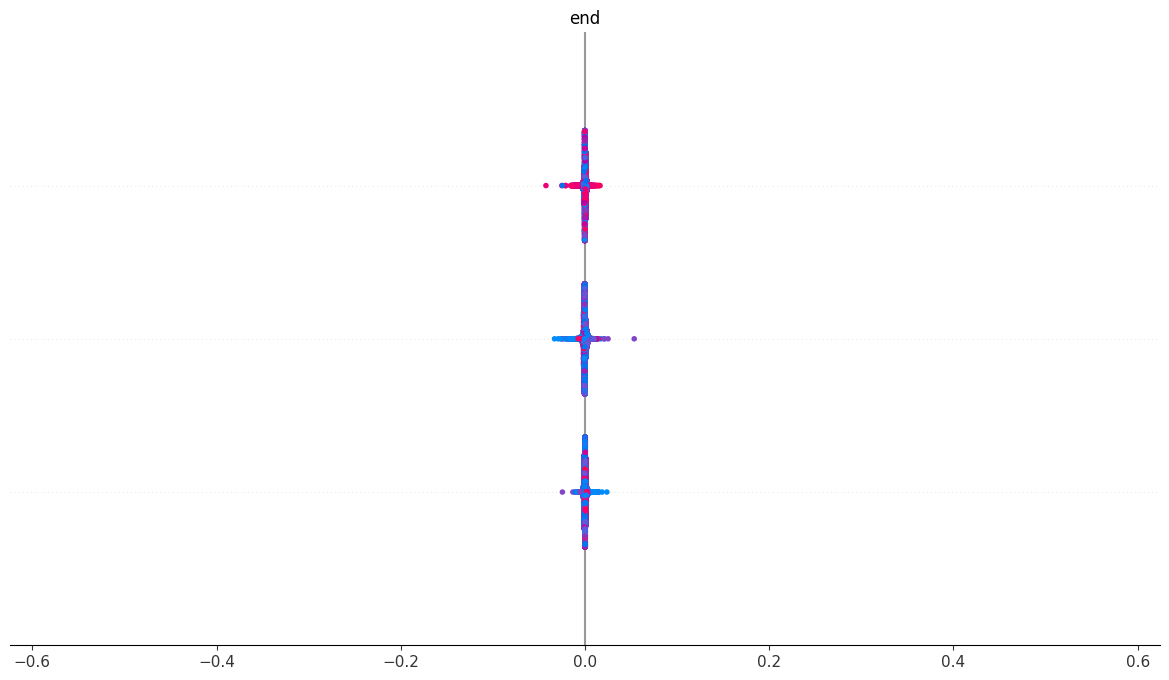

In [65]:
import shap

# Create a SHAP explainer for tree-based models
explainer = shap.TreeExplainer(model) # Use TreeExplainer instead of LinearExplainer
shap_values = explainer.shap_values(X_test)

# Visualize SHAP summary plot
shap.summary_plot(shap_values, X_test)

In [66]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to your training target variable
label_encoder.fit(y_train)

# Transform both training and testing target variables
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Now, use the encoded target variables for training and evaluation
model = XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train_encoded)  # Use encoded y_train

# Evaluate model
y_pred = model.predict(X_test)  # Use encoded X_test if necessary
print("Classification Report:\n", classification_report(y_test_encoded, y_pred)) # Use encoded y_test

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3594
           1       1.00      1.00      1.00      3587
           2       1.00      1.00      1.00      3607

    accuracy                           1.00     10788
   macro avg       1.00      1.00      1.00     10788
weighted avg       1.00      1.00      1.00     10788



### 4.0 Feature Engineering

In [67]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Retrain the model
model.fit(X_train_poly, y_train_encoded)
y_pred = model.predict(X_test_poly)
print("Classification Report:\n", classification_report(y_test_encoded, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3594
           1       1.00      1.00      1.00      3587
           2       1.00      1.00      1.00      3607

    accuracy                           1.00     10788
   macro avg       1.00      1.00      1.00     10788
weighted avg       1.00      1.00      1.00     10788



In [68]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2]
}

# Perform grid search
grid_search = GridSearchCV(XGBClassifier(random_state=42), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train_encoded)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate best model
y_pred = grid_search.predict(X_test)
print("Classification Report:\n", classification_report(y_test_encoded, y_pred))

Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3594
           1       1.00      1.00      1.00      3587
           2       1.00      1.00      1.00      3607

    accuracy                           1.00     10788
   macro avg       1.00      1.00      1.00     10788
weighted avg       1.00      1.00      1.00     10788



In [69]:
print(pd.Series(y).value_counts())

state
euthymia      17979
mania          3230
depression     2050
Name: count, dtype: int64


In [70]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [71]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  depression       1.00      1.00      1.00      3594
    euthymia       1.00      1.00      1.00      3587
       mania       1.00      1.00      1.00      3607

    accuracy                           1.00     10788
   macro avg       1.00      1.00      1.00     10788
weighted avg       1.00      1.00      1.00     10788



In [72]:
from sklearn.ensemble import RandomForestClassifier

# Define class weights using the actual class labels
class_weights = {'depression': 1, 'euthymia': 5, 'mania': 8}

# Create and train the model
model = RandomForestClassifier(class_weight=class_weights)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight={'depression': 1, 'euthymia': 5,
                                     'mania': 8})

In [73]:
# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix # Import confusion_matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["euthymia", "mania", "depression"]))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

    euthymia       1.00      1.00      1.00      3594
       mania       1.00      1.00      1.00      3587
  depression       1.00      1.00      1.00      3607

    accuracy                           1.00     10788
   macro avg       1.00      1.00      1.00     10788
weighted avg       1.00      1.00      1.00     10788


Confusion Matrix:
[[3594    0    0]
 [   0 3587    0]
 [   0    0 3607]]


In [74]:
# Check for duplicate samples
duplicates = X_resampled.duplicated()
print("Number of duplicate samples:", duplicates.sum())

Number of duplicate samples: 18


In [75]:
X_resampled = X_resampled.drop_duplicates()
y_resampled = y_resampled[~duplicates]

In [76]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["euthymia", "mania", "depression"]))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    euthymia       1.00      1.00      1.00      3594
       mania       1.00      1.00      1.00      3587
  depression       1.00      1.00      1.00      3607

    accuracy                           1.00     10788
   macro avg       1.00      1.00      1.00     10788
weighted avg       1.00      1.00      1.00     10788

Confusion Matrix:
[[3594    0    0]
 [   0 3587    0]
 [   0    0 3607]]


In [77]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [78]:
class_weights = {'depression': 5, 'euthymia': 1, 'mania': 5}  # Use class labels as keys
model = RandomForestClassifier(class_weight=class_weights, random_state=42)
model.fit(X_resampled, y_resampled)

RandomForestClassifier(class_weight={'depression': 5, 'euthymia': 1,
                                     'mania': 5},
                       random_state=42)

In [79]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced'), param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_resampled, y_resampled)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [80]:
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=["euthymia", "mania", "depression"]))

Validation Classification Report:
              precision    recall  f1-score   support

    euthymia       1.00      1.00      1.00      2824
       mania       1.00      1.00      1.00      2934
  depression       1.00      1.00      1.00      2878

    accuracy                           1.00      8636
   macro avg       1.00      1.00      1.00      8636
weighted avg       1.00      1.00      1.00      8636



In [81]:
y_test_pred = model.predict(X_test)
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=["euthymia", "mania", "depression"]))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Test Classification Report:
              precision    recall  f1-score   support

    euthymia       1.00      1.00      1.00      3594
       mania       1.00      1.00      1.00      3587
  depression       1.00      1.00      1.00      3607

    accuracy                           1.00     10788
   macro avg       1.00      1.00      1.00     10788
weighted avg       1.00      1.00      1.00     10788

Test Confusion Matrix:
[[3594    0    0]
 [   0 3587    0]
 [   0    0 3607]]


In [82]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='f1_macro')
print("Cross-Validation F1 Scores:", cv_scores)
print("Mean CV F1 Score:", np.mean(cv_scores))

Cross-Validation F1 Scores: [1. 1. 1. 1. 1.]
Mean CV F1 Score: 1.0


In [83]:
# Train a Random Forest classifier with class weights and regularization
# Assuming 'depression', 'euthymia', 'mania' are your class labels
class_weights = {
    0: 5,  # depression
    1: 1,  # euthymia
    2: 5   # mania
}

# Assuming y_resampled contains string labels, convert them to numerical labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_resampled_encoded = label_encoder.fit_transform(y_resampled)

# Create and train the model with encoded labels
model = RandomForestClassifier(
    class_weight=class_weights,
    max_depth=10,  # Reduce depth to prevent overfitting
    min_samples_split=10,  # Increase minimum samples for splitting
    random_state=42
)
model.fit(X_resampled, y_resampled_encoded)  # Use encoded labels

# Evaluate using cross-validation
cv_scores = cross_val_score(model, X_resampled, y_resampled_encoded, cv=5, scoring='f1_macro') # Use encoded labels
print("\nCross-Validation F1 Scores:", cv_scores)
print("Mean CV F1 Score:", np.mean(cv_scores))

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Decode the predictions if necessary (before evaluation)
y_test_pred = label_encoder.inverse_transform(y_test_pred)


Cross-Validation F1 Scores: [1. 1. 1. 1. 1.]
Mean CV F1 Score: 1.0


In [84]:
# Evaluate the model on the test set
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=["euthymia", "mania", "depression"]))

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


Test Classification Report:
              precision    recall  f1-score   support

    euthymia       1.00      1.00      1.00      3594
       mania       1.00      1.00      1.00      3587
  depression       1.00      1.00      1.00      3607

    accuracy                           1.00     10788
   macro avg       1.00      1.00      1.00     10788
weighted avg       1.00      1.00      1.00     10788


Test Confusion Matrix:
[[3594    0    0]
 [   0 3587    0]
 [   0    0 3607]]


In [85]:
model = RandomForestClassifier(
    n_estimators=100,  # Reduce the number of trees
    max_depth=5,  # Limit the depth of trees
    min_samples_split=10,  # Increase the minimum samples for splitting
    class_weight='balanced',  # Use class weights to handle imbalance
    random_state=42
)

In [86]:
model.fit(X_resampled, y_resampled)

# Evaluate using cross-validation
cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='f1_macro')
print("\nCross-Validation F1 Scores:", cv_scores)
print("Mean CV F1 Score:", np.mean(cv_scores))



Cross-Validation F1 Scores: [0.99559936 0.99397783 0.99316704 0.99536775 0.99629361]
Mean CV F1 Score: 0.9948811180584809


In [87]:
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Evaluate the model on the test set
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=["euthymia", "mania", "depression"]))

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


Test Classification Report:
              precision    recall  f1-score   support

    euthymia       0.98      1.00      0.99      3594
       mania       1.00      0.98      0.99      3587
  depression       1.00      1.00      1.00      3607

    accuracy                           0.99     10788
   macro avg       0.99      0.99      0.99     10788
weighted avg       0.99      0.99      0.99     10788


Test Confusion Matrix:
[[3594    0    0]
 [  73 3514    0]
 [   0    0 3607]]


In [88]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder

# If y_train is one-hot encoded, convert it back to a 1D array
if y_train.ndim == 2 and y_train.shape[1] > 1:  # Check if one-hot encoded
    label_encoder = LabelEncoder()
    # Assuming original labels were strings, fit on unique values
    label_encoder.fit(np.unique(df['state']))
    y_train = label_encoder.inverse_transform(np.argmax(y_train, axis=1))
    # y_test may also need conversion if it was one-hot encoded
    y_test = label_encoder.inverse_transform(np.argmax(y_test, axis=1))

# Initialize and train the model
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [89]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Create a LabelEncoder to convert string labels to numerical labels
label_encoder = LabelEncoder()

# Fit the LabelEncoder on the unique target variable values
label_encoder.fit(np.unique(y_resampled))

# Transform the target variable to numerical labels
y_resampled_encoded = label_encoder.transform(y_resampled)

# Define the XGBoost model
model = XGBClassifier(random_state=42, scale_pos_weight=10)  # Adjust scale_pos_weight for class imbalance

# Hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='f1_macro')
grid_search.fit(X_resampled, y_resampled_encoded)

# Print best parameters
print("\nBest Parameters:", grid_search.best_params_)

# Train the model with the best parameters
model = grid_search.best_estimator_
model.fit(X_resampled, y_resampled_encoded)

# Encode y_test using the same LabelEncoder
y_test_encoded = label_encoder.transform(y_test)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model on the test set
print("\nTest Classification Report:")
print(classification_report(y_test_encoded, y_pred, target_names=["euthymia", "mania", "depression"]))

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred))


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}

Test Classification Report:
              precision    recall  f1-score   support

    euthymia       1.00      1.00      1.00      3594
       mania       1.00      1.00      1.00      3587
  depression       1.00      1.00      1.00      3607

    accuracy                           1.00     10788
   macro avg       1.00      1.00      1.00     10788
weighted avg       1.00      1.00      1.00     10788


Test Confusion Matrix:
[[3594    0    0]
 [   0 3587    0]
 [   0    0 3607]]


### 5.0 Deep Learning models

In [90]:
!pip install imbalanced-learn tensorflow-addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 12.7 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.2
    Uninstalling typeguard-4.4.2:
      Successfully uninstalled typeguard-4.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.5.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [91]:
!pip install tfa-nightly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.3/620.3 kB 12.9 MB/s eta 0:00:00


In [92]:
import numpy as np
from sklearn.model_selection import train_test_split

# Drop duplicates before splitting, keeping the first occurrence
_, indices = np.unique(X_resampled, axis=0, return_index=True)

# Use .iloc[] for integer-location based indexing to select rows
X_unique = X_resampled.iloc[indices]  # Use .iloc[] to select rows
y_unique = y_resampled.iloc[indices]  # Use .iloc[] to select rows

# Proper stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X_unique, y_unique, test_size=0.2, stratify=y_unique, random_state=42
)

In [93]:
# Convert arrays to sets for intersection check
common_samples = np.intersect1d(X_train, X_test, assume_unique=True)
print("Common samples in train & test:", len(common_samples))

Common samples in train & test: 253309


In [94]:
import pandas as pd

df = pd.DataFrame(X_train)
correlation_matrix = df.corr()
print(correlation_matrix)

              start       end  sentiment     happy       sad     anger  \
start      1.000000  0.994796  -0.078742 -0.048603  0.008763  0.141534   
end        0.994796  1.000000  -0.066382 -0.039747  0.008647  0.135238   
sentiment -0.078742 -0.066382   1.000000  0.777024 -0.513790 -0.622985   
happy     -0.048603 -0.039747   0.777024  1.000000 -0.408754 -0.438712   
sad        0.008763  0.008647  -0.513790 -0.408754  1.000000  0.084662   
anger      0.141534  0.135238  -0.622985 -0.438712  0.084662  1.000000   
disgust   -0.007383 -0.000320  -0.084688 -0.025539  0.105486  0.048680   
surprise   0.082568  0.079931  -0.649994 -0.411954  0.308497  0.585099   
fear      -0.015011  0.000131  -0.016503 -0.048469  0.129901 -0.013787   

            disgust  surprise      fear  
start     -0.007383  0.082568 -0.015011  
end       -0.000320  0.079931  0.000131  
sentiment -0.084688 -0.649994 -0.016503  
happy     -0.025539 -0.411954 -0.048469  
sad        0.105486  0.308497  0.129901  
anger  

In [95]:
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Bidirectional, Dropout, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Ensure X is a NumPy array
X = np.array(X, dtype=np.int32)

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Get the vocabulary size (max index + 1)
vocab_size = np.max(X) + 1  # Assumes indices are 0-based

# Model definition
input_dim = vocab_size  # Vocabulary size
embedding_dim = 128  # You can experiment with different embedding dimensions

model = Sequential([
    # Embedding layer: input_dim is vocab_size, output_dim is the size of the embedding vectors
    Embedding(input_dim=input_dim, output_dim=embedding_dim, input_length=X_train.shape[1]),

    # Bidirectional LSTM layer
    Bidirectional(LSTM(64, return_sequences=True)),

    # Dropout to prevent overfitting
    Dropout(0.5),

    # Another Bidirectional LSTM layer
    Bidirectional(LSTM(32)),

    # Fully connected layer
    Dense(16, activation='relu'),

    # Dropout to prevent overfitting
    Dropout(0.3),

    # Output layer with softmax activation for multi-class classification
    Dense(len(np.unique(y)), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,  # Use encoded y_train
    validation_data=(X_test, y_test),  # Use encoded y_test
    epochs=10,
    batch_size=32
)

# Model evaluation
score = model.evaluate(X_test, y_test, batch_size=32)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

# Prediction and evaluation metrics
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

print(classification_report(y_test, y_pred))

Epoch 1/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.8242 - loss: 0.4798 - val_accuracy: 0.9035 - val_loss: 0.2193
Epoch 2/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8875 - loss: 0.2414 - val_accuracy: 0.9063 - val_loss: 0.2010
Epoch 3/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8916 - loss: 0.2293 - val_accuracy: 0.8966 - val_loss: 0.2029
Epoch 4/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8941 - loss: 0.2133 - val_accuracy: 0.9048 - val_loss: 0.2019
Epoch 5/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9020 - loss: 0.2037 - val_accuracy: 0.9031 - val_loss: 0.2084
Epoch 6/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8972 - loss: 0.2057 - val_accuracy: 0.8861 - val_loss: 0.2035
Epoch 7/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8986 - loss: 0.2005 - val_accuracy: 0.8953 - val_loss: 0.2041
Epoch 8/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8920 - loss: 0.2033 - val_a

### 5.1 Improvement of deep learning model

In [96]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Ensure to have your data (X, y) prepared
# Assume X_train, X_test, y_train, y_test are already split and preprocessed

# Compute class weights to handle class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Build the LSTM model
model = Sequential()

# Embedding layer for text input (if applicable)
model.add(Embedding(input_dim=10000, output_dim=128, input_length=X_train.shape[1]))

# Add LSTM layer
model.add(LSTM(128, return_sequences=False))  # 128 units, adjust as needed
model.add(Dropout(0.2))  # Dropout to reduce overfitting

# Add Dense layer for classification
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))  # Dropout again to reduce overfitting

# Output layer for classification (assuming 3 classes)
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Implement early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with class weights and early stopping
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    class_weight=class_weight_dict,  # Class weights to handle imbalance
    callbacks=[early_stopping]  # Early stopping callback
)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get class predictions

# Print classification report and accuracy score
print(classification_report(y_test, y_pred_classes))
print(f'Overall Accuracy: {accuracy_score(y_test, y_pred_classes):.4f}')

# Optionally, compute and plot the AUC-ROC if applicable
from sklearn.metrics import roc_auc_score
try:
    auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
    print(f'AUC-ROC: {auc:.4f}')
except ValueError as e:
    print(f'AUC-ROC calculation failed: {e}')

Epoch 1/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7187 - loss: 0.5082 - val_accuracy: 0.8255 - val_loss: 0.3446
Epoch 2/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8117 - loss: 0.2402 - val_accuracy: 0.8151 - val_loss: 0.3907
Epoch 3/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8226 - loss: 0.2199 - val_accuracy: 0.8108 - val_loss: 0.3604
Epoch 4/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.8148 - loss: 0.2187 - val_accuracy: 0.8095 - val_loss: 0.3543
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       399
           1       0.99      0.78      0.87      3602
           2       0.61      0.96      0.74       651

    accuracy                           0.83      4652
   macro avg       0.70      0.91      0.76      4652
weighted avg       0.90      0.83      0.84      4652

Overall Accuracy: 0.8255
AUC-ROC: 0.9711


Epoch 1/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step - accuracy: 0.6183 - loss: 0.9512 - val_accuracy: 0.8293 - val_loss: 0.4032
Epoch 2/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.8220 - loss: 0.2804 - val_accuracy: 0.8252 - val_loss: 0.3941
Epoch 3/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 40s 38ms/step - accuracy: 0.8200 - loss: 0.2622 - val_accuracy: 0.8272 - val_loss: 0.3821
Epoch 4/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.8244 - loss: 0.2504 - val_accuracy: 0.8194 - val_loss: 0.3997
Epoch 5/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.8169 - loss: 0.2556 - val_accuracy: 0.8306 - val_loss: 0.3670
Epoch 6/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 23s 39ms/step - accuracy: 0.8316 - loss: 0.2430 - val_accuracy: 0.8132 - val_loss: 0.3979
Epoch 7/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - accuracy: 0.8423 - loss: 0.2274 - val_accuracy: 0.8104 - val_loss: 0.3941
Epoch 8/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.8247 - loss: 0.2451 - 

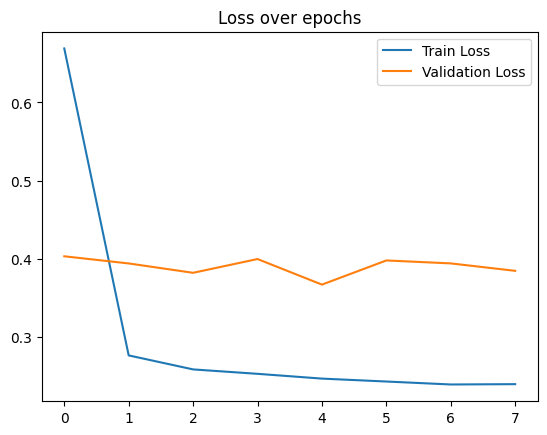

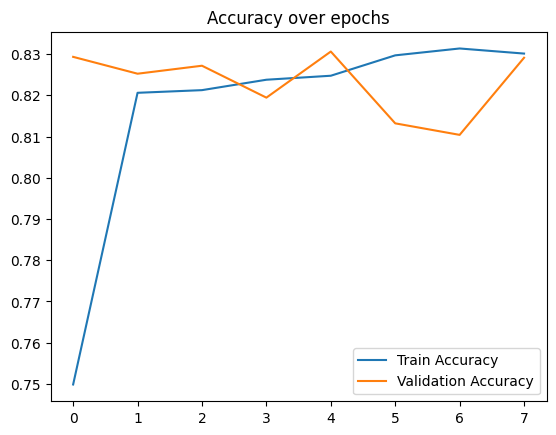

Overall Accuracy: 0.8306104901117799


In [97]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Embedding, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight

# Assuming the data is preprocessed and split into X_train, X_test, y_train, y_test

# 1. Compute Class Weights to handle imbalanced classes
class_weight = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weight))

# 2. Define the model
model = Sequential()

# Embedding Layer
model.add(Embedding(input_dim=5000, output_dim=128, input_length=X_train.shape[1]))  # Adjust vocabulary size and input_length

# Dropout for regularization
model.add(SpatialDropout1D(0.2))

# LSTM Layer (Can experiment with different units)
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))

# Dense Layer
model.add(Dense(3, activation='softmax'))  # Adjust the number of classes (e.g., 3 classes: depression, euthymia, mania)

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0001)  # Fine-tuned learning rate
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 3. EarlyStopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 4. Train the model with class weights, early stopping, and validation data
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
    class_weight=class_weight_dict,  # Handle class imbalance
    callbacks=[early_stopping]
)

# 5. Model Evaluation
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# 6. Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_classes))

# 7. AUC-ROC Score Calculation
auc_roc = roc_auc_score(y_test, y_pred, multi_class='ovr')  # One-vs-Rest approach for multi-class AUC-ROC
print(f"AUC-ROC: {auc_roc}")

# 8. Plot the training and validation loss/accuracy (optional)
import matplotlib.pyplot as plt

# Training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over epochs')
plt.show()

# Training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over epochs')
plt.show()

# 9. Overall Accuracy Calculation
accuracy = np.mean(y_pred_classes == y_test)
print(f"Overall Accuracy: {accuracy}")

In [98]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import (Bidirectional, LSTM, Embedding, Dense,
                                    Dropout, SpatialDropout1D, BatchNormalization)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight

# 1. Enhanced Class Weight Handling
class_weights = compute_class_weight(class_weight='balanced',
                                   classes=np.unique(y_train),
                                   y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# 2. Improved Model Architecture
model = Sequential()

# Enhanced Embedding Layer
model.add(Embedding(input_dim=5000,
                   output_dim=256,  # Increased embedding dimension
                   input_length=X_train.shape[1],
                   embeddings_regularizer=l2(1e-5)))

model.add(SpatialDropout1D(0.3))  # Slightly higher dropout

# First Bidirectional LSTM with return sequences
model.add(Bidirectional(LSTM(128,
                           return_sequences=True,
                           dropout=0.2,
                           recurrent_dropout=0.2,
                           kernel_regularizer=l2(1e-4))))
model.add(BatchNormalization())

# Second Bidirectional LSTM
model.add(Bidirectional(LSTM(64,
                           dropout=0.2,
                           recurrent_dropout=0.2)))
model.add(BatchNormalization())

# Dense Layers with regularization
model.add(Dense(64, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.3))
model.add(BatchNormalization())

# Output Layer
model.add(Dense(3, activation='softmax'))

# 3. Enhanced Optimizer with gradient clipping
optimizer = Nadam(learning_rate=0.0005, clipnorm=1.0)
model.compile(optimizer=optimizer,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 4. Improved Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
]

# 5. Train with larger batch size and more epochs
history = model.fit(
    X_train, y_train,
    epochs=20,  # Increased epochs
    batch_size=64,  # Larger batch size
    validation_data=(X_test, y_test),
    class_weight=class_weight_dict,
    callbacks=callbacks
)

# Evaluation remains the same
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Classification Report:\n", classification_report(y_test, y_pred_classes))
auc_roc = roc_auc_score(y_test, y_pred, multi_class='ovr')
print(f"AUC-ROC: {auc_roc}")
print(f"Overall Accuracy: {np.mean(y_pred_classes == y_test)}")

Epoch 1/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 64s 156ms/step - accuracy: 0.5881 - loss: 0.7950 - val_accuracy: 0.8515 - val_loss: 0.4931 - learning_rate: 5.0000e-04
Epoch 2/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 43s 147ms/step - accuracy: 0.8058 - loss: 0.3938 - val_accuracy: 0.8558 - val_loss: 0.4006 - learning_rate: 5.0000e-04
Epoch 3/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 82s 146ms/step - accuracy: 0.8199 - loss: 0.3329 - val_accuracy: 0.7926 - val_loss: 0.5647 - learning_rate: 5.0000e-04
Epoch 4/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 81s 141ms/step - accuracy: 0.8310 - loss: 0.2873 - val_accuracy: 0.8203 - val_loss: 0.4421 - learning_rate: 5.0000e-04
Epoch 5/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 82s 142ms/step - accuracy: 0.8342 - loss: 0.2704 - val_accuracy: 0.8134 - val_loss: 0.4246 - learning_rate: 5.0000e-04
Epoch 6/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 83s 145ms/step - accuracy: 0.8337 - loss: 0.2600 - val_accuracy: 0.8093 - val_loss: 0.4274 - learning_rate: 1.0000e-04
Epoch 7/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 82s 14

In [104]:
import pandas as pd
from google.colab import drive

# ... (Your existing code for creating the 'df' DataFrame) ...

# Save the DataFrame to JSON in Google Drive
def save_df_to_json(df, file_path):
    """Saves a pandas DataFrame to a JSON file in Google Drive.

    Args:
        df: The pandas DataFrame to save.
        file_path: The full file path in Google Drive.
    """
    # Mount Google Drive
    drive.mount('/content/drive')

    # Convert DataFrame to JSON-serializable format
    json_data = df.to_json(orient='records')

    # Save to JSON file
    with open(file_path, 'w') as f:
        f.write(json_data)

    print(f"✅ DataFrame saved to: {file_path}")

# Example usage
file_path = "/content/drive/MyDrive/Research on BD NYU /development/CMU-MOSEI/processed_mosei.json"
save_df_to_json(df, file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ DataFrame saved to: /content/drive/MyDrive/Research on BD NYU /development/CMU-MOSEI/processed_mosei.json
